<a href="https://colab.research.google.com/github/BelenFranzoni/DiploCsDatos2024/blob/main/ExplorayCura/Analisis_Var_num_Entregable_parte_2_2024_30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

## **Edición 2024**


----

# Trabajo práctico entregable - parte 2


In [ ]:
# @title
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_context('talk')

In [ ]:
#@title Descargo el DataSet.
melb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

Tras esta primer presentación de los datos, observamos que hay 13580 entradas en nuestra tabla con 21 Variables.
Cuatro de estas Variables, no están completas:

Car

BuildingArea

YearBuilt

CouncilArea

# Información del Data Set - 21 Columnas:

0 - Suburb: region - <font color ="Blue"> **Objeto**

1 - Address: property address - <font color ="Blue"> **Objeto**

2 - Rooms: Number of rooms - <font color ="Green"> **Numérica**

3 - Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential. - <font color ="Blue"> **Objeto**

4 - Price: Price in dollars - <font color ="Green"> **Numérica**

5 - Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available. - <font color ="Blue"> **Objeto**

6 - SellerG: Real Estate Agent - <font color ="Blue"> **Objeto**

7 - Date: Date sold - <font color ="Blue"> **Objeto**

8 - Distance: Distance from CBD - <font color ="Green"> **Numérica**

9 - PostCode - <font color ="Green"> **Numérica**

10 - Bedroom2 : Scraped # of Bedrooms (from different source) - <font color ="Green"> **Numérica**

11 - Bathroom: Number of Bathrooms - <font color ="Green"> **Numérica**

12 - Car: Number of carspots - <font color ="Green"> **Numérica**

13 - Landsize: Land Size - <font color ="Green"> **Numérica**

14 - BuildingArea: Building Size - <font color ="Green"> **Numérica**

15 - YearBuilt - <font color ="Green"> **Numérica**

16 - CouncilArea: Governing council for the area - <font color ="Blue"> **Objeto**

17 - Lattitude - <font color ="Green"> **Numérica**

18 - Logitude - <font color ="Green"> **Numérica**

19 - Regionname: General Region (West, North West, North, North east …etc) - <font color ="Blue"> **Objeto**

20 - Propertycount: Number of properties that exist in the suburb. - <font color ="Green"> **Numérica**



In [ ]:
#@markdown Despliego algunos datos del DataSet
melb_df.sample(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
5613,South Yarra,403/700 Chapel St,2,u,865000.0,S,Williams,8/10/2016,3.3,3141.0,...,2.0,1.0,0.0,NaN,2000.0,Stonnington,-37.8361,144.9966,Southern Metropolitan,14887.0
2129,Doncaster,2 Nola St,3,h,1125000.0,VB,hockingstuart,4/03/2017,13.9,3108.0,...,2.0,2.0,819.0,173.0,1970.0,Manningham,-37.7810,145.1036,Eastern Metropolitan,9028.0
6974,Hawthorn East,13/84 Campbell Rd,1,u,365000.0,SP,Jellis,12/11/2016,7.5,3123.0,...,1.0,0.0,2274.0,NaN,NaN,Boroondara,-37.8339,145.0550,Southern Metropolitan,6482.0
2567,Fitzroy North,5/35 Jamieson St,3,t,1015000.0,S,Collins,8/10/2016,3.5,3068.0,...,2.0,1.0,112.0,145.0,2000.0,Yarra,-37.7912,144.9825,Northern Metropolitan,6244.0
1341,Brunswick,5 Hanover St,3,h,985000.0,S,Jellis,22/05/2016,5.2,3056.0,...,1.0,2.0,384.0,89.0,1940.0,Moreland,-37.7626,144.9535,Northern Metropolitan,11918.0
14,Abbotsford,7/20 Abbotsford St,1,u,441000.0,SP,Greg,14/05/2016,2.5,3067.0,...,1.0,1.0,0.0,NaN,NaN,Yarra,-37.8016,144.9988,Northern Metropolitan,4019.0
3068,Hampton,4/32 Linacre Rd,2,u,750000.0,PI,hockingstuart,18/06/2016,13.7,3188.0,...,1.0,2.0,153.0,NaN,1970.0,Bayside,-37.9429,145.0049,Southern Metropolitan,5454.0
5182,Reservoir,10 Gilbank St,3,h,921500.0,S,Nelson,22/05/2016,11.2,3073.0,...,2.0,1.0,527.0,177.0,1950.0,Darebin,-37.7238,144.9964,Northern Metropolitan,21650.0
3651,Kew,9/25 Derby St,2,u,557000.0,S,Nelson,24/09/2016,5.6,3101.0,...,1.0,1.0,0.0,NaN,NaN,Boroondara,-37.8034,145.0369,Southern Metropolitan,10331.0
5097,Reservoir,3 Hillcroft St,3,h,810000.0,SP,Nelson,10/12/2016,11.2,3073.0,...,1.0,2.0,564.0,558.0,1960.0,Darebin,-37.7196,144.9899,Northern Metropolitan,21650.0


# <font color ="Green"> **Análisis de Variables Numéricas, previo al Encoding y a la Imputación**

Voy a trabajar con el Data Frame "melb_df" para extraer algunas variables numéricas:

Creo la variable "Interesting_var" con variables numéricas de interés


Voy a preparar gráficos tipo Boxplot e histogramas para analizar estas variables, si hay algunas que tengan muchos puntos con gran variación

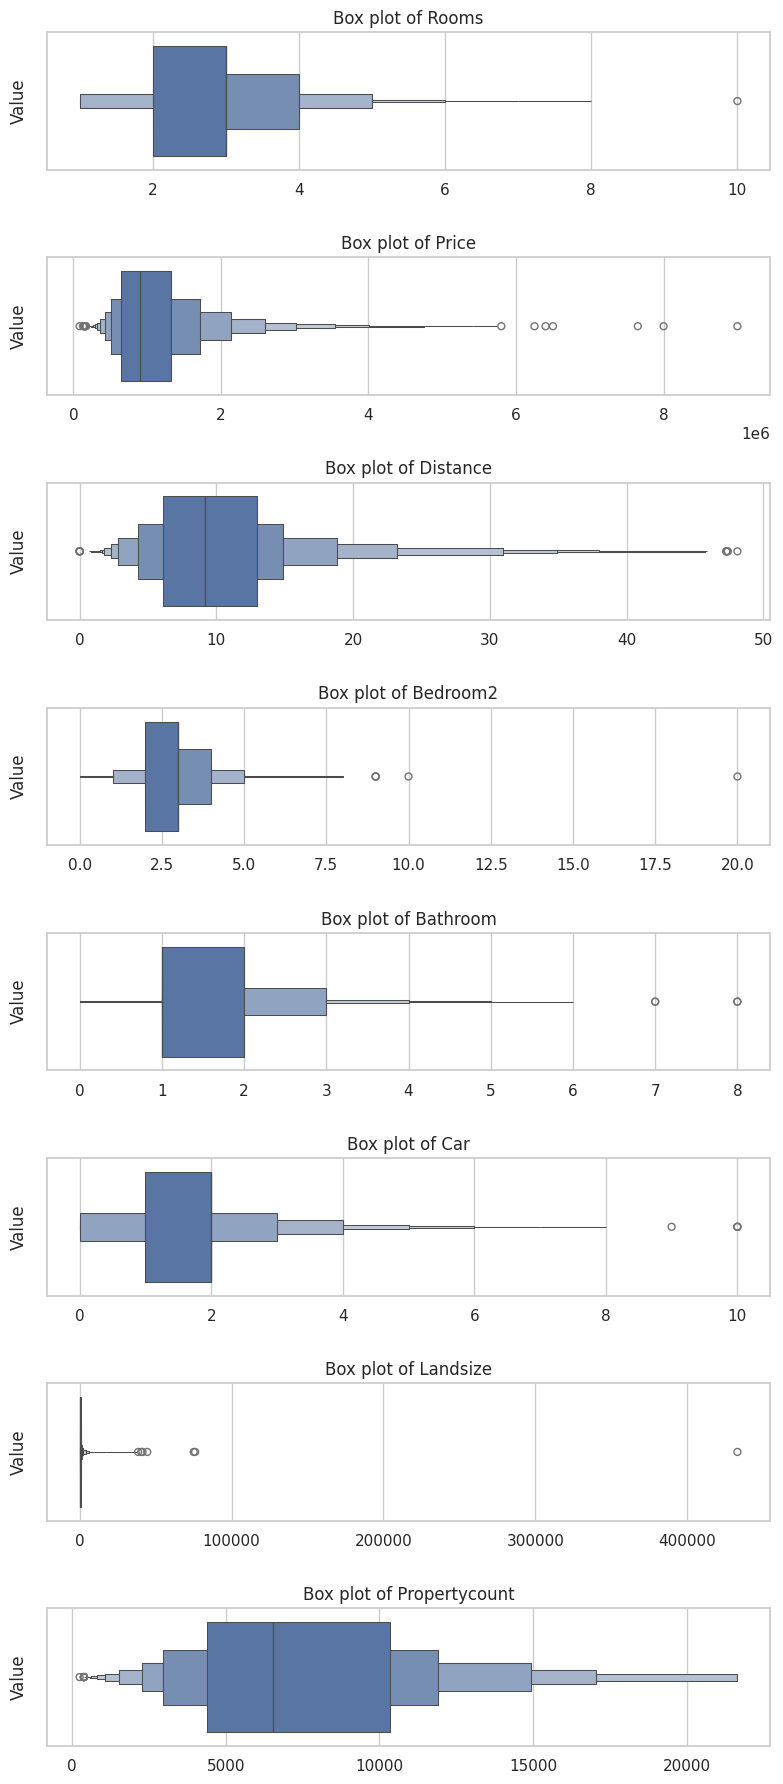

In [ ]:
# @title Podemos realizar un gráfico Boxen, comparando la distribución de datos entre las **Variables Numéricas** del Nuevo Data Frame,
# @markdown En este análisis sólo incluiremos:
# @markdown 'Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'BuildingArea', 'YearBuilt',
# @markdown 'Landsize', 'Propertycount'
# Sample DataFrame
Interesting_var= ['Rooms', 'Price', 'Distance',
       'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'BuildingArea', 'YearBuilt',
       'Landsize', 'Lattitude', 'Longtitude', 'Propertycount']
melb_numerical_var = melb_df[Interesting_var]

Important_var_col = ['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom',
                     'Car' ,'Landsize', 'Propertycount']
melb_numerical_var_2 = melb_numerical_var[Important_var_col]

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(8, 18))

# Loop through each column and create a boxplot
for ax, column in zip(axes, melb_numerical_var_2.columns):
    sns.boxenplot(x=melb_numerical_var_2[column], ax=ax)
    ax.set_title(f'Box plot of {column}')
    ax.set_xlabel('')  # Remove x-label to avoid clutter
    ax.set_ylabel('Value')  # Set a common y-label for better readability

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

## Si realizamos la limpieza de los datos de esta columna quedan valores más limpios para trabajar posteriormente.
# Agregaremos una limpieza por quantiles de las tablas
Podemos limpiar las variables Landsize, Bedroom2, Bathroom, Car , Distance y Price.

In [ ]:
# @title
# Calculate the 1st and 99.5th percentiles for the specified columns
Important_var_col2 = ['Price', 'Distance', 'Bedroom2', 'Bathroom',
                     'Car' ,'Landsize',]
quantiles = melb_df[Important_var_col2].quantile([0.005, 0.995])

melb_df_1 = melb_df
# Filter the DataFrame to keep only the data within the 1st and 99th percentiles for the specified columns
for column_f in Important_var_col2:
    lower_bound = quantiles.loc[0.005, column_f]
    upper_bound = quantiles.loc[0.995, column_f]
    melb_df_2 = melb_df_1[(melb_df_1[column_f] >= lower_bound) & (melb_df_1[column_f] <= upper_bound)]
    melb_df_1 = melb_df_2
# Print the cleaned DataFrame
#print(melb_df_2)
melb_df_2.info()
# Optionally, save the cleaned DataFrame to a new CSV file
#df.to_csv('cleaned_data.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
Index: 13100 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13100 non-null  object 
 1   Address        13100 non-null  object 
 2   Rooms          13100 non-null  int64  
 3   Type           13100 non-null  object 
 4   Price          13100 non-null  float64
 5   Method         13100 non-null  object 
 6   SellerG        13100 non-null  object 
 7   Date           13100 non-null  object 
 8   Distance       13100 non-null  float64
 9   Postcode       13100 non-null  float64
 10  Bedroom2       13100 non-null  float64
 11  Bathroom       13100 non-null  float64
 12  Car            13100 non-null  float64
 13  Landsize       13100 non-null  float64
 14  BuildingArea   6888 non-null   float64
 15  YearBuilt      7922 non-null   float64
 16  CouncilArea    11835 non-null  object 
 17  Lattitude      13100 non-null  float64
 18  Longtitude 

# Ahora revisamos los boxenplots nuevamente

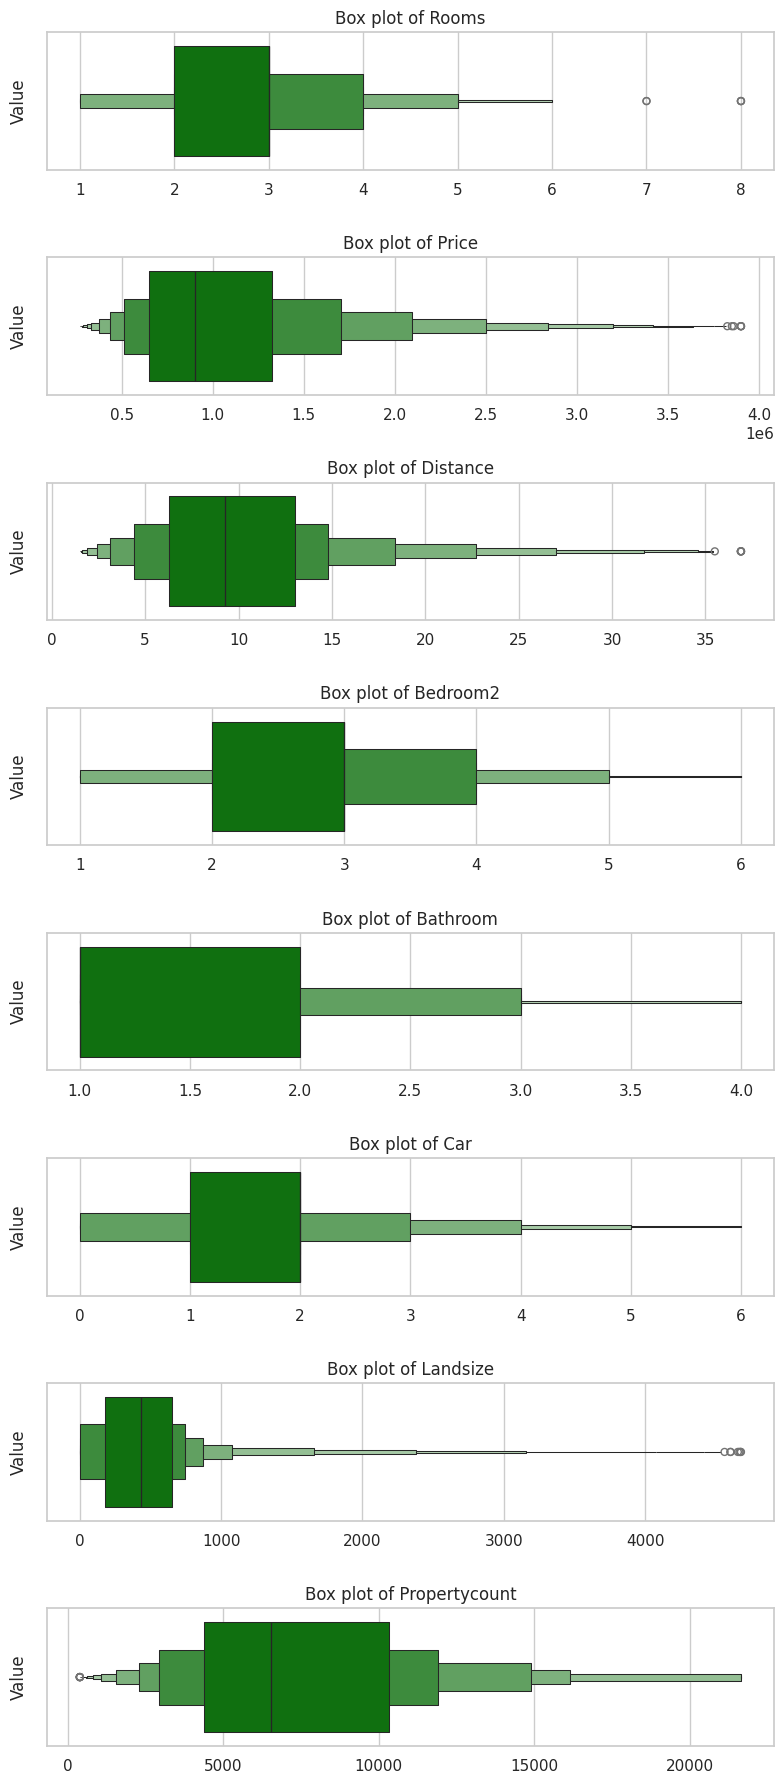

In [ ]:
# @title Gráfico Boxen, comparando la distribución de datos entre las **Variables Numéricas** del Nuevo Data Frame Filtrado por quantiles 0,5 y 99,5,
# @markdown En este análisis sólo incluiremos:
# @markdown 'Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'BuildingArea', 'YearBuilt',
# @markdown 'Landsize', 'Propertycount'
# @ Ahora los datos bajaron a de 13580 a 13093
# Sample DataFrame

Important_var_col = ['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom',
                     'Car' ,'Landsize', 'Propertycount']
melb_numerical_var_f = melb_df_2[Important_var_col]

# Set the style of seaborn
sns.set(style="whitegrid")
sns.color_palette("husl", 8)

# Create a figure with subplots
fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(8, 18))


# Loop through each column and create a boxplot
for ax, column in zip(axes, melb_numerical_var_f.columns):
    sns.boxenplot(x=melb_numerical_var_f[column], ax=ax, color='green')
    ax.set_title(f'Box plot of {column}')
    ax.set_xlabel('')  # Remove x-label to avoid clutter
    ax.set_ylabel('Value')  # Set a common y-label for better readability

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

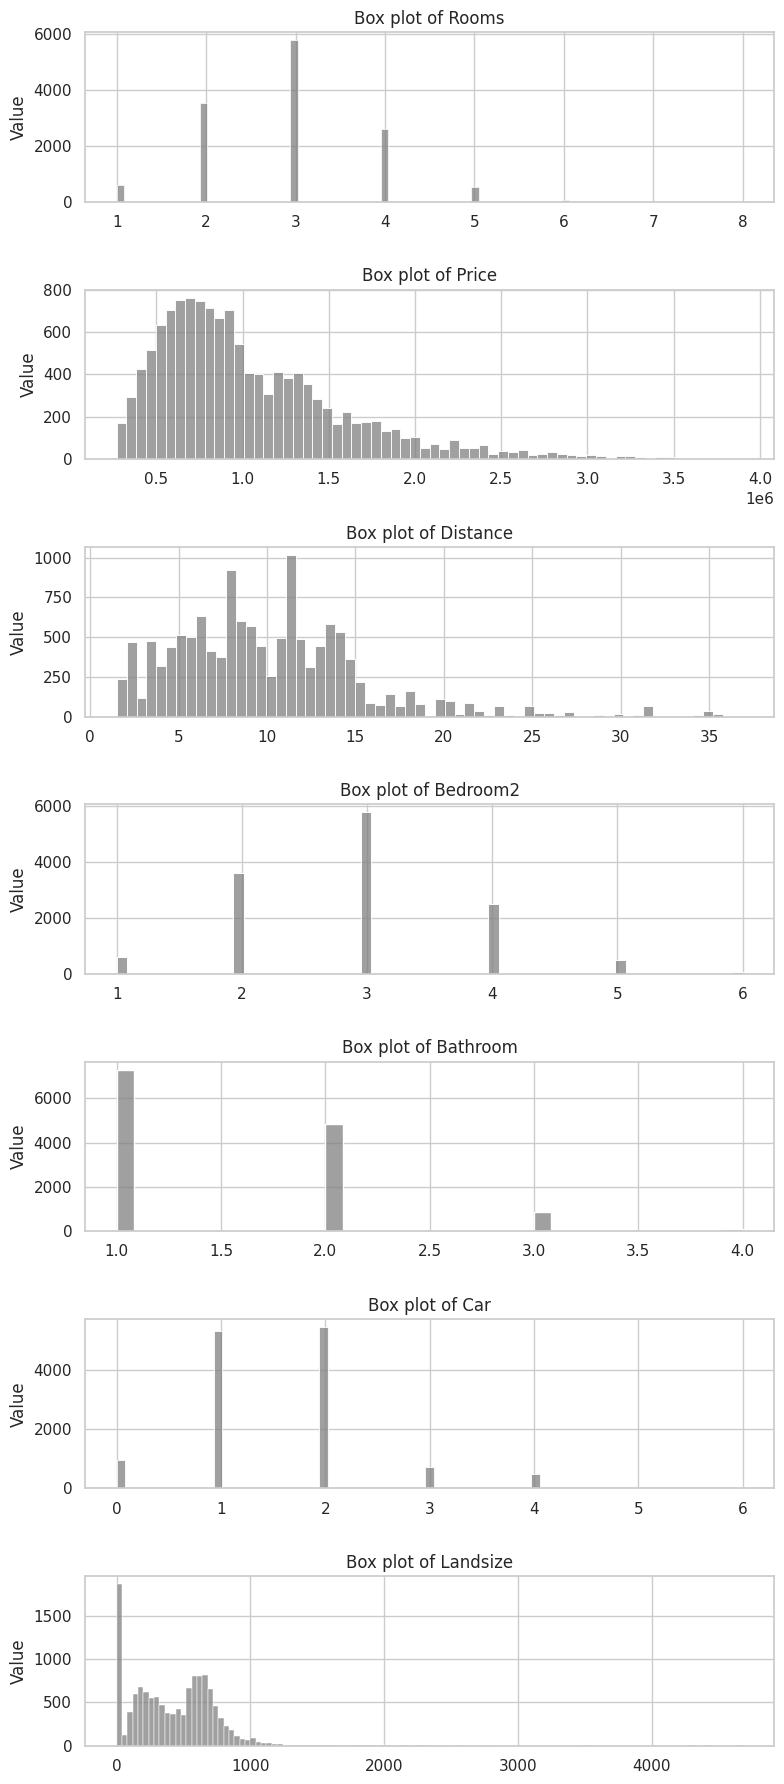

In [ ]:
# @title Grafico Histograma , comparando la distribución de datos entre las **Variables Numéricas** del Nuevo Data Frame Filtrado por quantiles 0,5 y 99,5,
# @markdown En este análisis sólo incluiremos:
# @markdown 'Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'BuildingArea', 'YearBuilt',
# @markdown 'Landsize', 'Propertycount'
# @ Ahora los datos bajaron a de 13580 a 13100
# Sample DataFrame

Important_var_col = ['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom',
                     'Car' ,'Landsize', 'Propertycount']
melb_numerical_var_f = melb_df_2[Important_var_col]

# Set the style of seaborn
sns.set(style="whitegrid")
sns.color_palette("husl", 8)

# Create a figure with subplots
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(8, 18))


# Loop through each column and create a boxplot
for ax, column in zip(axes, melb_numerical_var_f.columns):
    sns.histplot(x=melb_numerical_var_f[column], ax=ax, color='gray')
    ax.set_title(f'Box plot of {column}')
    ax.set_xlabel('')  # Remove x-label to avoid clutter
    ax.set_ylabel('Value')  # Set a common y-label for better readability

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

# Al ver estas distribuciones en Landsize hay muchos datos con un LandSize de 0, quizás pueda deberse a departamentos por ejemplo. No borraremos estos puntos de Base de Datos, pero no lo tendremos en cuenta para el análisis PCA


# La base de Datos, cuyos datos numéricos se han limpiado es melb_df_2

In [ ]:
melb_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13100 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13100 non-null  object 
 1   Address        13100 non-null  object 
 2   Rooms          13100 non-null  int64  
 3   Type           13100 non-null  object 
 4   Price          13100 non-null  float64
 5   Method         13100 non-null  object 
 6   SellerG        13100 non-null  object 
 7   Date           13100 non-null  object 
 8   Distance       13100 non-null  float64
 9   Postcode       13100 non-null  float64
 10  Bedroom2       13100 non-null  float64
 11  Bathroom       13100 non-null  float64
 12  Car            13100 non-null  float64
 13  Landsize       13100 non-null  float64
 14  BuildingArea   6888 non-null   float64
 15  YearBuilt      7922 non-null   float64
 16  CouncilArea    11835 non-null  object 
 17  Lattitude      13100 non-null  float64
 18  Longtitude 

# Se podrían estandarizar las variables para ver este tipo de distribuciones Normalizadas o Estandarizadas, por ejemplo.

In [ ]:
#@title Estandarización con distintos métodos
#@markdown Salidas:

#@markdown df_StandarScaler

#@markdown df_RobustScaler

#@markdown df_MinMaxScaler

#@markdown df_Normalizer

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

# Paso 1: Cargar el DataFrame
# Suponiendo que tienes un archivo CSV
df_to_scale = melb_df_2[Important_var_col]


# Paso 2: Seleccionar las columnas numéricas
numeric_columns = df_to_scale.select_dtypes(include=['number']).columns

# Paso 3: Crear el transformador StandardScaler
scaler1 = StandardScaler()
scaler2 = RobustScaler()
scaler3 = MinMaxScaler()
scaler4 = Normalizer()

# Paso 4: Ajustar y transformar los datos con las 4 Aproximaciones
df_scaled1 = scaler1.fit_transform(melb_df_2[numeric_columns])
df_scaled2 = scaler2.fit_transform(melb_df_2[numeric_columns])
df_scaled3 = scaler3.fit_transform(melb_df_2[numeric_columns])
df_scaled4 = scaler4.fit_transform(melb_df_2[numeric_columns])


# Paso 5: Crear un nuevo DataFrame con los datos transformados
df_scaled1 = pd.DataFrame(df_scaled1, columns=numeric_columns)
df_scaled2 = pd.DataFrame(df_scaled2, columns=numeric_columns)
df_scaled3 = pd.DataFrame(df_scaled3, columns=numeric_columns)
df_scaled4 = pd.DataFrame(df_scaled4, columns=numeric_columns)

# Si quieres mantener las columnas no numéricas en el DataFrame final
df_non_numeric = melb_df_2.drop(columns=Important_var_col)
df_StandarScaler = pd.concat([df_scaled1, df_non_numeric.reset_index(drop=True)], axis=1)
df_RobustScaler = pd.concat([df_scaled2, df_non_numeric.reset_index(drop=True)], axis=1)
df_MinMaxScaler = pd.concat([df_scaled3, df_non_numeric.reset_index(drop=True)], axis=1)
df_Normalizer = pd.concat([df_scaled4, df_non_numeric.reset_index(drop=True)], axis=1)

# Mostrar el nuevo DataFrame transformado
df_StandarScaler.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13100 entries, 0 to 13099
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          13100 non-null  float64
 1   Price          13100 non-null  float64
 2   Distance       13100 non-null  float64
 3   Bedroom2       13100 non-null  float64
 4   Bathroom       13100 non-null  float64
 5   Car            13100 non-null  float64
 6   Landsize       13100 non-null  float64
 7   Propertycount  13100 non-null  float64
 8   Suburb         13100 non-null  object 
 9   Address        13100 non-null  object 
 10  Type           13100 non-null  object 
 11  Method         13100 non-null  object 
 12  SellerG        13100 non-null  object 
 13  Date           13100 non-null  object 
 14  Postcode       13100 non-null  float64
 15  BuildingArea   6888 non-null   float64
 16  YearBuilt      7922 non-null   float64
 17  CouncilArea    11835 non-null  object 
 18  Lattit

# Podemos hacer un Histplot, para ver las distribuciones de datos luego de Transformar.

<Figure size 800x500 with 0 Axes>

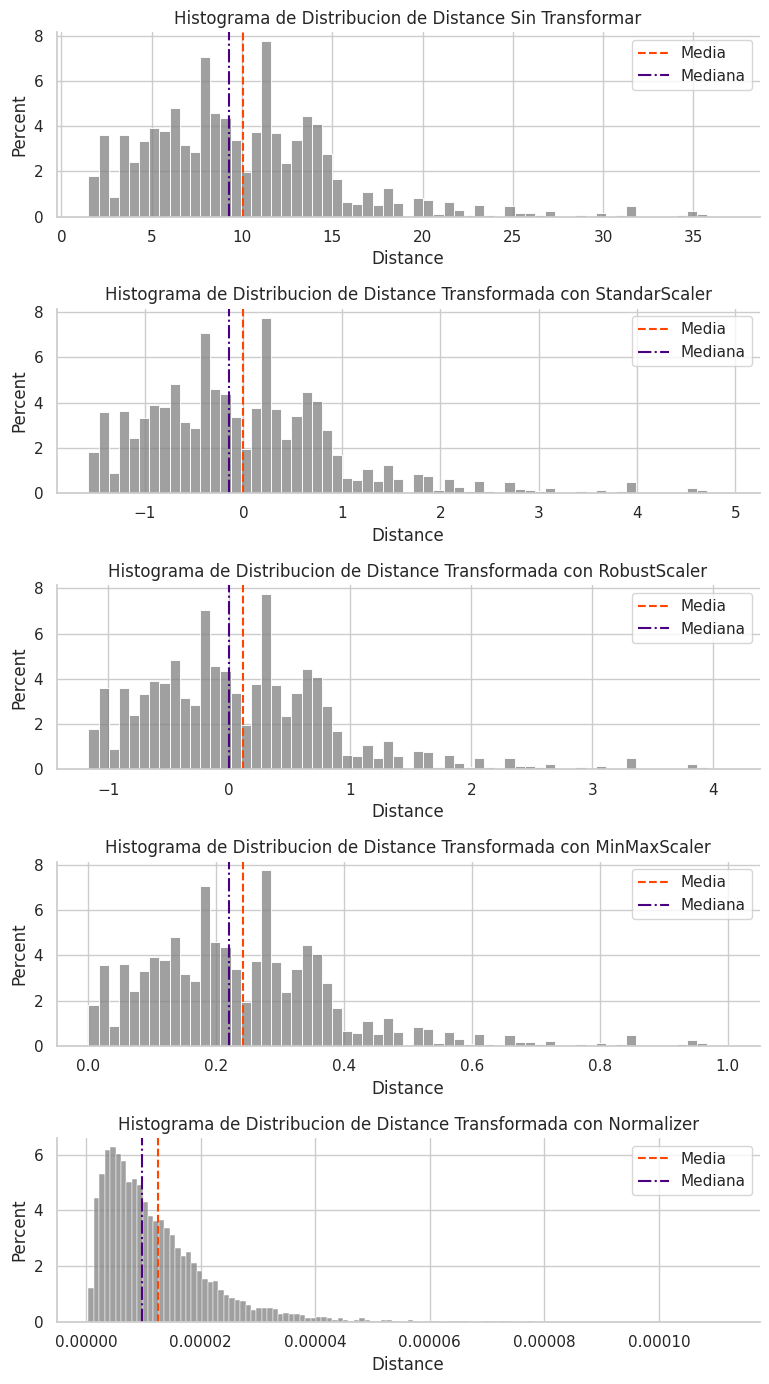

In [ ]:
# @title Podemos realizar histogramas, comparando las distribuciones obtenidas luego de las dintintas Transformaciones:

plt.figure(figsize=(8, 5))
# Filter DataFrame for specific programming languages
Categoria = "Distance" #@param ["Rooms", "Price", "Distance", "Bedroom2", "Bathroom" , "Car" ,"Landsize", "Propertycount"]



## La diferencia no siempre se aprecia en los gráficos
fig, axes = plt.subplots(nrows=5, figsize=(8, 14))

sns.histplot(melb_df_2[Categoria], bins = "auto", ax=axes[0], color='gray',  stat = "percent")
axes[0].axvline(melb_df_2[Categoria].mean(), color='orangered',
            linestyle='--', label='Media')
axes[0].axvline(melb_df_2[Categoria].median(), color='indigo',
            linestyle='-.', label='Mediana')
axes[0].set_title('Histograma de Distribucion de {} Sin Transformar'.format(Categoria))
axes[0].legend(loc='upper right')  # Add legend box at upper right corner

sns.histplot(df_StandarScaler[Categoria], bins = "auto", ax=axes[1], color='gray',  stat = "percent")
axes[1].axvline(df_StandarScaler[Categoria].mean(), color='orangered',
            linestyle='--', label='Media')
axes[1].axvline(df_StandarScaler[Categoria].median(), color='indigo',
            linestyle='-.', label='Mediana')
axes[1].set_title('Histograma de Distribucion de {} Transformada con StandarScaler'.format(Categoria))
axes[1].legend(loc='upper right')  # Add legend box at upper right corner

sns.histplot(df_RobustScaler[Categoria], bins = "auto", ax=axes[2], color='gray',  stat = "percent")
axes[2].axvline(df_RobustScaler[Categoria].mean(), color='orangered',
            linestyle='--', label='Media')
axes[2].axvline(df_RobustScaler[Categoria].median(), color='indigo',
            linestyle='-.', label='Mediana')
axes[2].set_title('Histograma de Distribucion de {} Transformada con RobustScaler'.format(Categoria))
axes[2].legend(loc='upper right')  # Add legend box at upper right corner

sns.histplot(df_MinMaxScaler[Categoria], bins = "auto", ax=axes[3], color='gray',  stat = "percent")
axes[3].axvline(df_MinMaxScaler[Categoria].mean(), color='orangered',
            linestyle='--', label='Media')
axes[3].axvline(df_MinMaxScaler[Categoria].median(), color='indigo',
            linestyle='-.', label='Mediana')
axes[3].set_title('Histograma de Distribucion de {} Transformada con MinMaxScaler'.format(Categoria))
axes[3].legend(loc='upper right')  # Add legend box at upper right corner

sns.histplot(df_Normalizer[Categoria], bins = "auto", ax=axes[4], color='gray',  stat = "percent")
axes[4].axvline(df_Normalizer[Categoria].mean(), color='orangered',
            linestyle='--', label='Media')
axes[4].axvline(df_Normalizer[Categoria].median(), color='indigo',
            linestyle='-.', label='Mediana')
axes[4].set_title('Histograma de Distribucion de {} Transformada con Normalizer'.format(Categoria))
axes[4].legend(loc='upper right')  # Add legend box at upper right corner

#axes[0].legend()

sns.despine()
plt.subplots_adjust(hspace=0.8)  # Adjust vertical spacing between subplots
plt.tight_layout()
plt.show()




# Realizamos un análisis estadistico del resultado de estas Transformaciones

In [ ]:
#@title Standar
df_scaled1.describe()


,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,Propertycount
count,1.310000e+04,1.310000e+04,1.310000e+04,1.310000e+04,1.310000e+04,1.310000e+04,1.310000e+04,1.310000e+04
mean,-2.429948e-16,1.735677e-16,2.082812e-16,2.082812e-16,1.692285e-16,1.388542e-16,-4.339192e-17,-1.193278e-16
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-2.080817e+00,-1.371506e+00,-1.574470e+00,-2.079127e+00,-8.044363e-01,-1.737813e+00,-1.084412e+00,-1.611038e+00
25%,-1.006032e+00,-7.127146e-01,-6.937869e-01,-9.921429e-01,-8.044363e-01,-6.521461e-01,-6.601089e-01,-6.969534e-01
50%,6.875342e-02,-2.706309e-01,-1.433602e-01,9.484146e-02,-8.044363e-01,4.335209e-01,-4.987569e-02,-2.015474e-01
75%,6.875342e-02,4.575069e-01,5.354993e-01,9.484146e-02,7.346488e-01,4.335209e-01,4.650086e-01,6.660430e-01
max,5.442678e+00,4.921685e+00,4.920565e+00,3.355795e+00,3.812819e+00,4.776189e+00,1.006903e+01,3.258508e+00


In [ ]:
#@title Robust
df_scaled2.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,Propertycount
count,13100.000000,13100.000000,13100.000000,13100.000000,13100.000000,13100.000000,13100.000000,13100.000000
mean,-0.063969,0.231265,0.116621,-0.087252,0.522672,-0.399313,0.044329,0.147871
std,0.930454,0.854572,0.813511,0.920012,0.649761,0.921128,0.888830,0.733706
min,-2.000000,-0.940741,-1.164179,-2.000000,0.000000,-2.000000,-0.919492,-1.034112
25%,-1.000000,-0.377778,-0.447761,-1.000000,0.000000,-1.000000,-0.542373,-0.363468
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.622222,0.552239,0.000000,1.000000,0.000000,0.457627,0.636532
max,5.000000,4.437037,4.119403,3.000000,3.000000,4.000000,8.993644,2.538565


In [ ]:
#@title MinMaxScaler
df_scaled3.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,Propertycount
count,13100.000000,13100.000000,13100.000000,13100.000000,13100.000000,13100.000000,13100.000000,13100.000000
mean,0.276576,0.217935,0.242411,0.382550,0.174224,0.266781,0.097227,0.330840
std,0.132922,0.158908,0.153970,0.184002,0.216587,0.153521,0.089662,0.205366
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.104683,0.135593,0.200000,0.000000,0.166667,0.038042,0.187715
50%,0.285714,0.174931,0.220339,0.400000,0.000000,0.333333,0.092755,0.289450
75%,0.285714,0.290634,0.324859,0.400000,0.333333,0.333333,0.138919,0.467617
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#@title Normalizer
df_scaled4.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,Propertycount
count,1.310000e+04,13100.000000,1.310000e+04,1.310000e+04,1.310000e+04,13100.000000,13100.000000,13100.000000
mean,3.251383e-06,0.999922,1.264378e-05,3.233559e-06,1.690691e-06,0.000002,0.000507,0.009225
std,1.388358e-06,0.000179,1.071177e-05,1.396231e-06,8.307913e-07,0.000001,0.000695,0.008419
min,4.081622e-07,0.996801,4.261362e-07,4.081622e-07,2.631578e-07,0.000000,0.000000,0.000128
25%,2.238786e-06,0.999932,5.381774e-06,2.222118e-06,1.081079e-06,0.000001,0.000177,0.003900
50%,3.029974e-06,0.999979,9.845978e-06,2.999996e-06,1.509420e-06,0.000002,0.000363,0.006492
75%,3.999892e-06,0.999992,1.657410e-05,3.999153e-06,2.150528e-06,0.000002,0.000643,0.011630
max,1.408243e-05,1.000000,1.120050e-04,1.408243e-05,8.246617e-06,0.000014,0.013662,0.079929


##Tras analizar los gráficos y la información estadística recomendariamos Standard o Robust Scaler

##Una vez analizada la base de datos, y prefiltrada podemos trabajar con la consigna planteada, quedan de respaldo los Data Frames Estandarizados, crearemos una copia del Dataframe para seguir trabajando.
Filtrado y Estandarización
Se emplearon las comlumnas:
"Rooms"
"Price"
"Distance"
"Bedroom2"
"Bathroom"
"Car"
"Landsize"
"Propertycount"

Las otras columnas no se modificaron
Quedan un par de variables numéricas como "BuildingArea" y "Yearbuilt" para imputar valores faltantes, y posteriormente Estandarizar.
Quedan sin tratar también las variables numéricas:

Postcode

Latitud

Longitud


# ## Ejercicio 1: Encoding
Trabajaremos con la base de datos de `df_StandarScaler` presentada a continuación.


1. Seleccionar todas las filas y columnas del conjunto de datos, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas.
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pd.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.




In [ ]:
#@markdown Hago una copia del DataFrame para trabajar en la Segunda parte y guadar un respaldo. Además en este punto podemos seleccionar los DataFrames obtenidos con las distintas metodologías de Transformación y repettir los procedimientos
melb_df_ST = df_RobustScaler

1. Seleccionar todas las filas y columnas del conjunto de datos, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.




# Columnas del data frame
Lo primero que haremos es ver cuales son todas las columnas de nuestro data frame, para luego poder quedarnos con todas menos con "BuildingArea" y "YearBuilt", como pide la consigna.

In [ ]:

melb_df_ST.columns

Index(['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'Propertycount', 'Suburb', 'Address', 'Type', 'Method', 'SellerG',
       'Date', 'Postcode', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname'],
      dtype='object')

In [ ]:
#@markdown Aquí obtengo información sobre el número de elementos de cada columna y el tipo de datos presente en cada columna
melb_df_ST.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13100 entries, 0 to 13099
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          13100 non-null  float64
 1   Price          13100 non-null  float64
 2   Distance       13100 non-null  float64
 3   Bedroom2       13100 non-null  float64
 4   Bathroom       13100 non-null  float64
 5   Car            13100 non-null  float64
 6   Landsize       13100 non-null  float64
 7   Propertycount  13100 non-null  float64
 8   Suburb         13100 non-null  object 
 9   Address        13100 non-null  object 
 10  Type           13100 non-null  object 
 11  Method         13100 non-null  object 
 12  SellerG        13100 non-null  object 
 13  Date           13100 non-null  object 
 14  Postcode       13100 non-null  float64
 15  BuildingArea   6888 non-null   float64
 16  YearBuilt      7922 non-null   float64
 17  CouncilArea    11835 non-null  object 
 18  Lattit

In [ ]:
# @title
#Primer Set alternativo
InterestingCols= ['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount']
melb_df_int = melb_df_ST[InterestingCols]
#melb_df_int.info()
melbcopia_df = melb_df_ST[InterestingCols]

Vemos para el próximo paso de encoding de contamos con las siguientes variables categóricas:

Suburb

Adress

Type

Method

SellerG

Date

CouncilArea

RegionName


In [ ]:
categoric_var = ['Suburb', 'Address','Type', 'Method', 'SellerG',
       'Date','CouncilArea', 'Regionname']
melb_categoric_var = melb_df_ST[categoric_var]

In [ ]:
melb_categoric_var.sample(10)

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
5470,South Yarra,1/47 Wilson St,u,PI,Jellis,4/03/2017,Stonnington,Southern Metropolitan
12001,Reservoir,165 Spring St,h,S,Nelson,3/09/2017,NaN,Northern Metropolitan
5343,Rosanna,109 Ellesmere Pde,h,SP,Miles,17/09/2016,Banyule,Eastern Metropolitan
11632,Epping,8 Shields St,h,S,HAR,29/07/2017,Whittlesea,Northern Metropolitan
589,Balwyn North,10 Seattle St,h,VB,Jellis,7/05/2016,Boroondara,Southern Metropolitan
8468,West Melbourne,53 Miller St,h,S,Purplebricks,22/04/2017,Melbourne,Northern Metropolitan
6791,Hawthorn East,1/36 Pleasant Rd,t,S,Jellis,15/10/2016,Boroondara,Southern Metropolitan
12590,Niddrie,59A Nolan St,t,SP,Barry,19/08/2017,NaN,Western Metropolitan
663,Balwyn North,15 Maughan Pde,h,PI,hockingstuart,28/05/2016,Boroondara,Southern Metropolitan
7611,Fairfield,3 Gillies St,h,PI,Woodards,13/05/2017,Darebin,Northern Metropolitan


Podemos tener una descripción de los valores en las variables categírcas del Data Frame


In [ ]:
#@markdown Aquí obtengo información sobre el número de datos diferentes en cada columna.
#@markdown Me informa la cantidad de columnas que puedo tener de cada Variable categórica al hacer encoding.
#@markdown Por ejemplo en Type obtendría 3 columnas tras hacer el OneHotEncoding

for categoricas in melb_categoric_var.columns:
  unique_values = melb_categoric_var[categoricas].nunique()
  print(f'Valores Unicos en las variable categoric {categoricas}: {unique_values}')

Valores Unicos en las variable categoric Suburb: 298
Valores Unicos en las variable categoric Address: 12911
Valores Unicos en las variable categoric Type: 3
Valores Unicos en las variable categoric Method: 5
Valores Unicos en las variable categoric SellerG: 258
Valores Unicos en las variable categoric Date: 58
Valores Unicos en las variable categoric CouncilArea: 31
Valores Unicos en las variable categoric Regionname: 8


De esta lista:

Suburb: region

Address: property address

Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Regionname: General Region (West, North West, North, North east …etc)

CouncilArea: Governing council for the area

Descartaremos:

<font color ="red"> SellerG : Muchos valores, e información nmo necesaria para el análisis.

<font color ="red"> Date sold: Muchos valores únicos, no práctico para el encoding

<font color ="red"> Address: Valores únicos

<font color ="red"> Method: Información no necsaria para el posterior análisis

Retendremos para el Encoding las siguientes variables:

<font color ="Blue"> **Suburb**

<font color ="Blue"> **Type**

<font color ="Blue"> **Regionname**

<font color ="Blue"> **CouncilArea**


In [ ]:
InterestingCols_categories = ['Suburb', 'Type','CouncilArea', 'Regionname']

#renombramos el data frame para no modificar el original
melbcopia_categories_df = melb_categoric_var[InterestingCols_categories]
melbcopia_categories_df.sample(5)

,Suburb,Type,CouncilArea,Regionname
2896,Gowanbrae,h,Moreland,Western Metropolitan
7056,West Footscray,h,Maribyrnong,Western Metropolitan
12943,Eltham North,h,NaN,Eastern Metropolitan
10592,Black Rock,h,Bayside,Southern Metropolitan
9233,Doncaster East,t,Manningham,Eastern Metropolitan


# Previo a la selección de estas 4 variables, analicemos un poco su contenido.
En primer lugar realizaremos un histograma contando cuántas veces se repiten las distintas variables categóricas

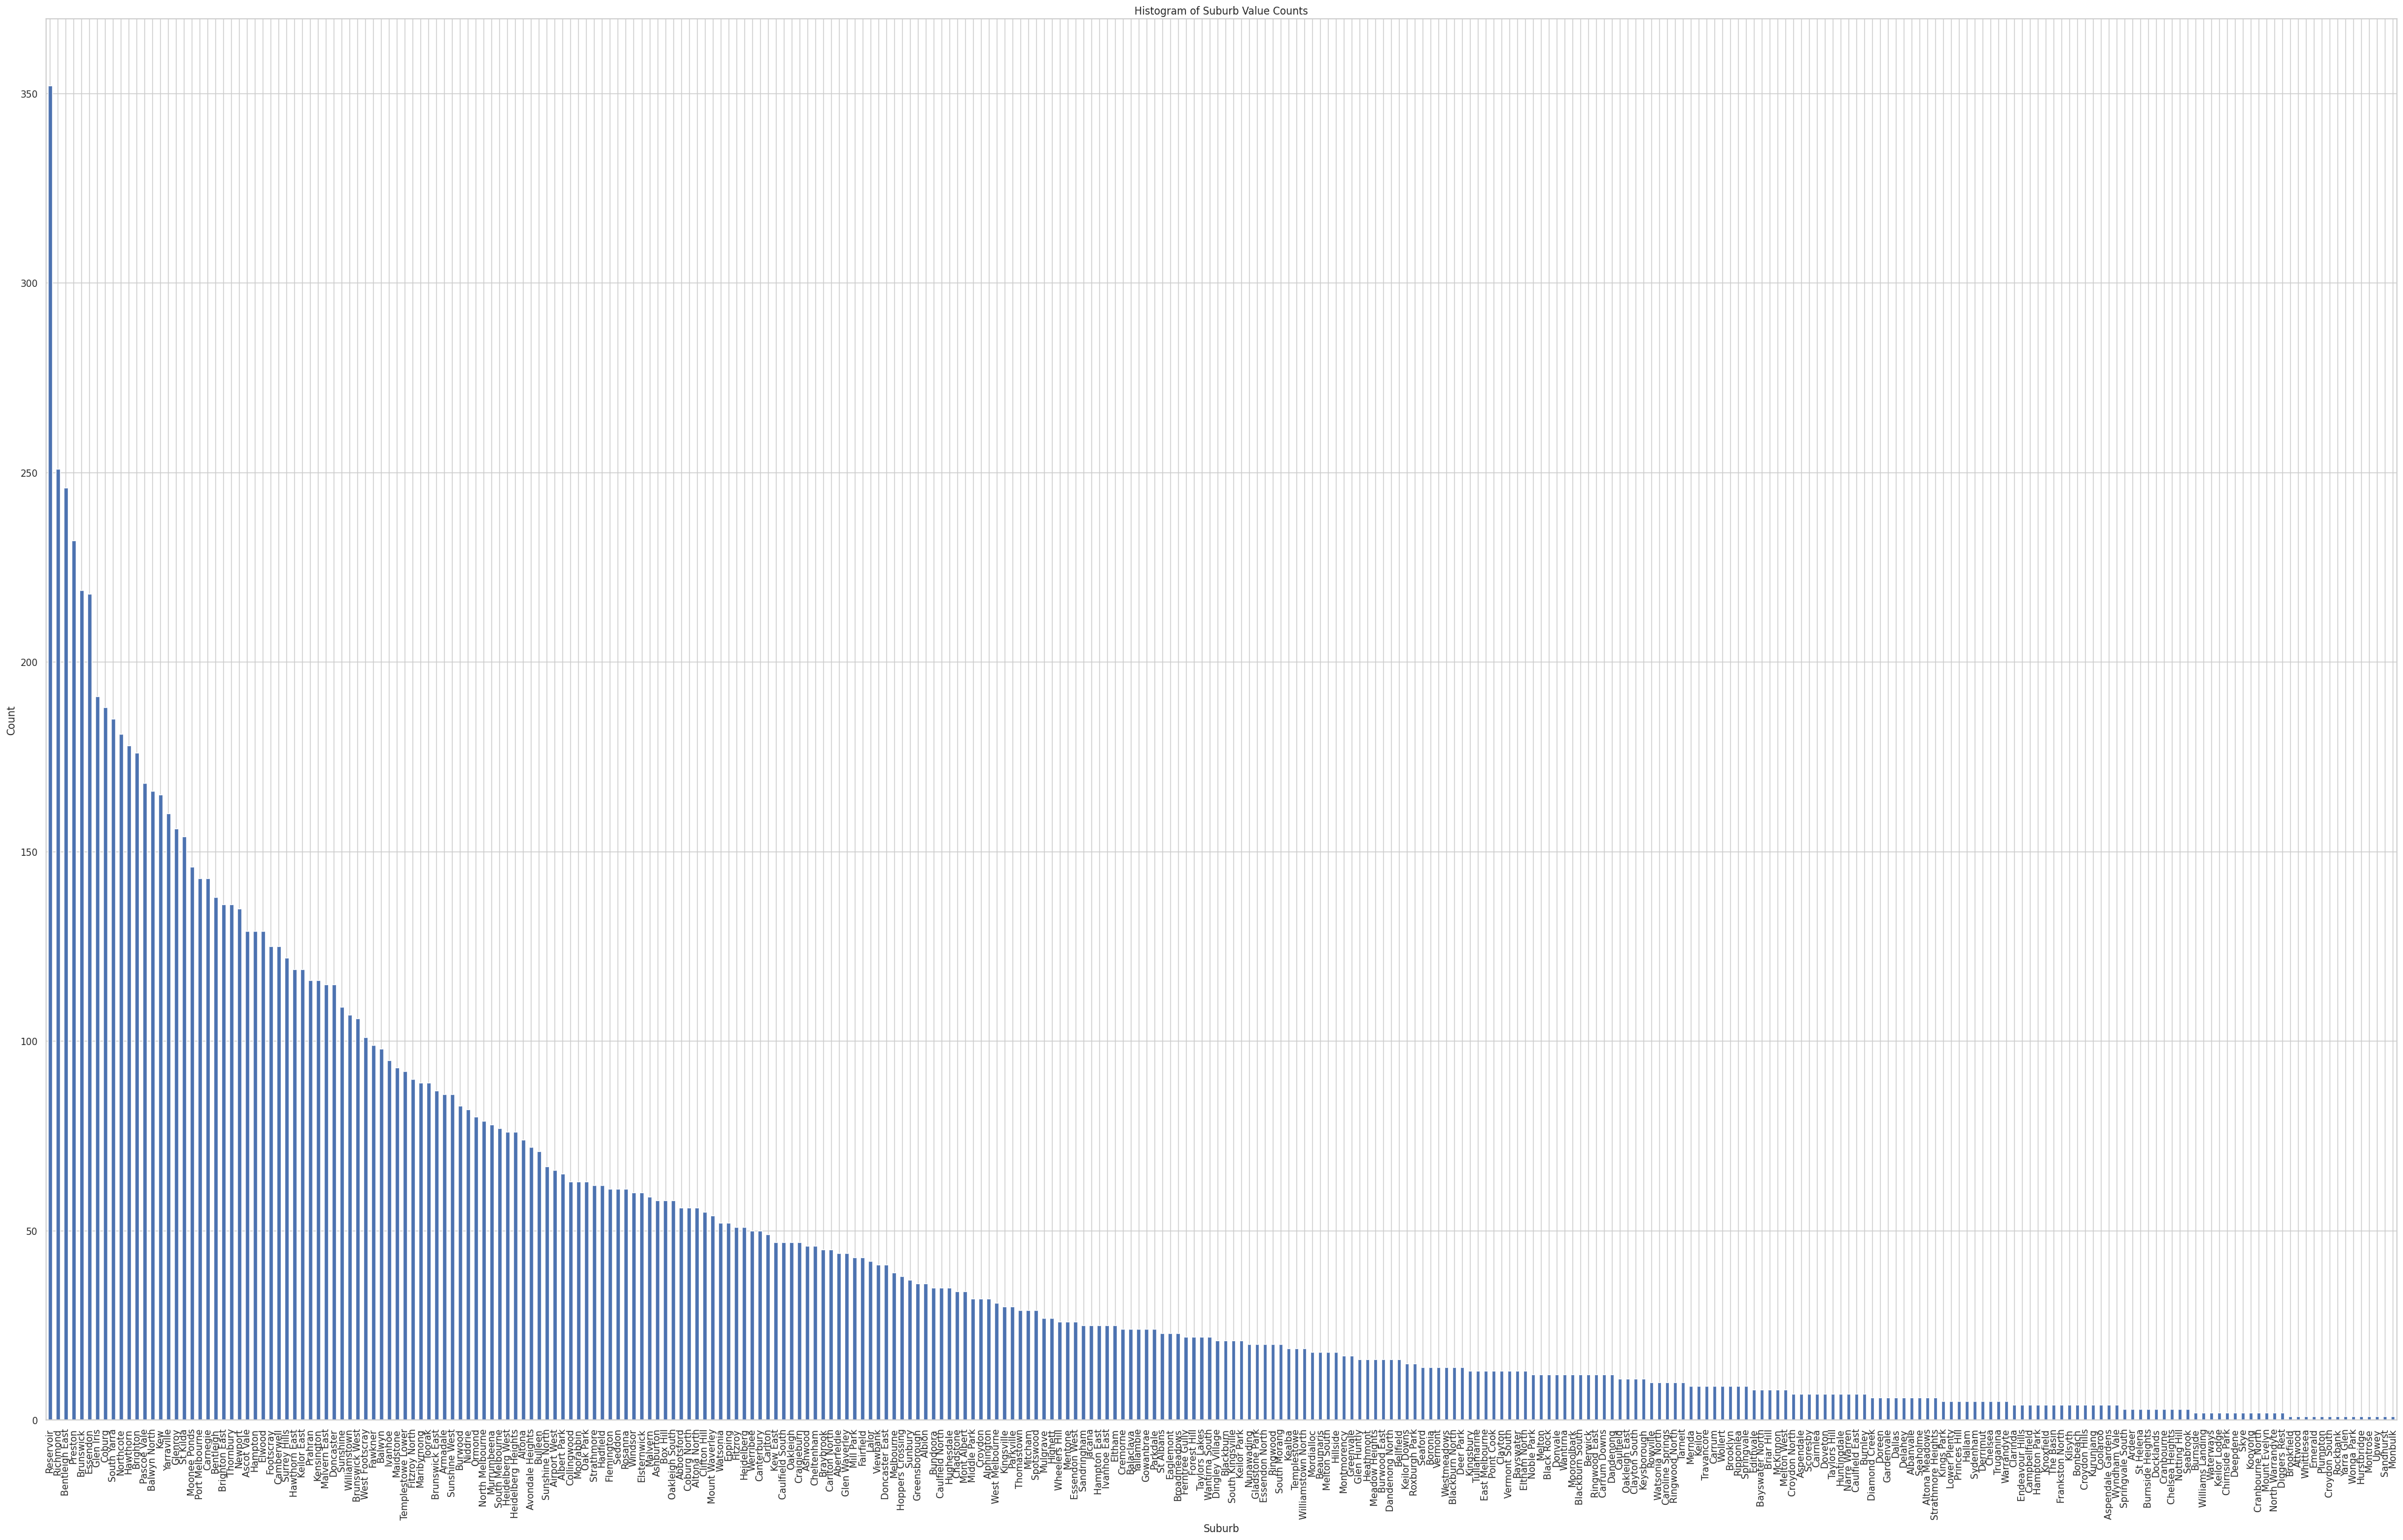

In [ ]:
#@title COLUMNA SUBURB
suburb_counts = melbcopia_categories_df.Suburb.value_counts()
# Creamos el histograma a partir de los conteos
plt.figure(figsize=(50, 30))
suburb_counts.plot(kind='bar')

# Añadir etiquetas y título
plt.xlabel('Suburb')
plt.ylabel('Count')
plt.title('Histogram of Suburb Value Counts')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor claridad

# Mostrar el histograma
plt.show()

In [ ]:
#@title En la columna Suburb hay muchos valores, podemos ver si cambia o no la lista si filtramos aquellos valores con menos de 3 entradas
suburb_counts = melbcopia_categories_df.Suburb.value_counts()
suburb_counts_filtered = suburb_counts[suburb_counts > 3]

print("Variables de Suburb sin Filtrar" , suburb_counts.nunique())

#@markdown Valores filtrados
print("Variables de Suburb filtro más de 3 entradas:" , suburb_counts_filtered.nunique())

Variables de Suburb sin Filtrar 112
Variables de Suburb filtro más de 3 entradas: 109


## No hay mucha diferencia, por lo que no filtraremos esta variable

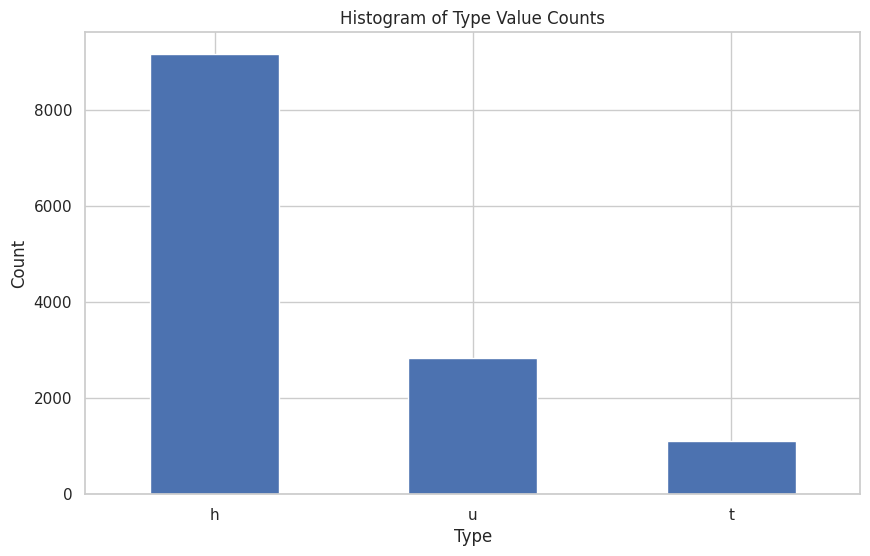

In [ ]:
#@title COLUMNA Type
Regionname_counts = melbcopia_categories_df.Type.value_counts()
# Creamos el histograma a partir de los conteos
plt.figure(figsize=(10, 6))
Regionname_counts.plot(kind='bar')

# Añadir etiquetas y título
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Histogram of Type Value Counts')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mayor claridad

# Mostrar el histograma
plt.show()

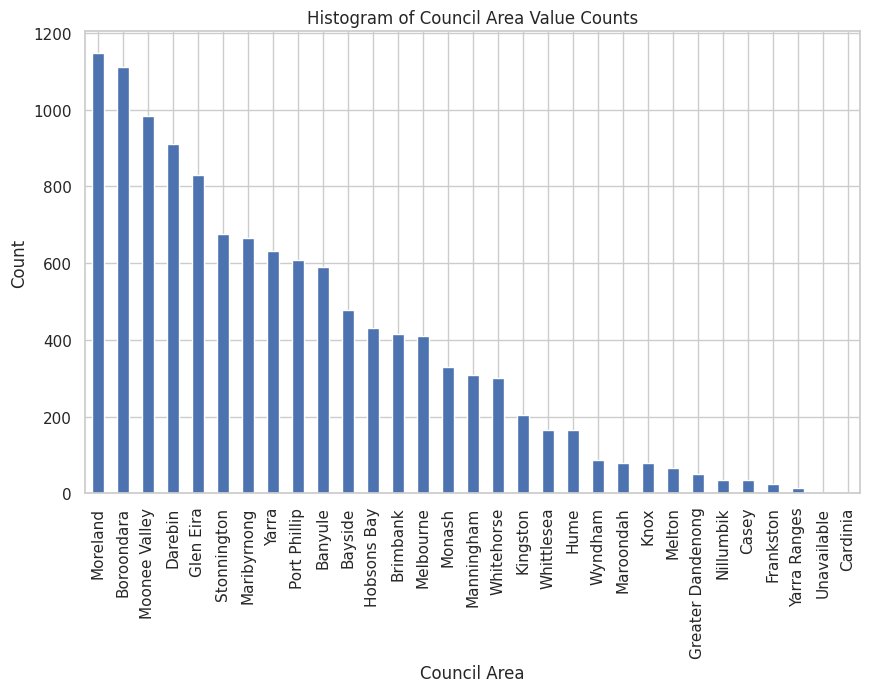

In [ ]:
#@title COLUMNA COUNCILAREA
Councilarea_counts = melbcopia_categories_df.CouncilArea.value_counts()
# Creamos el histograma a partir de los conteos
plt.figure(figsize=(10, 6))
Councilarea_counts.plot(kind='bar')

# Añadir etiquetas y título
plt.xlabel('Council Area')
plt.ylabel('Count')
plt.title('Histogram of Council Area Value Counts')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor claridad

# Mostrar el histograma
plt.show()

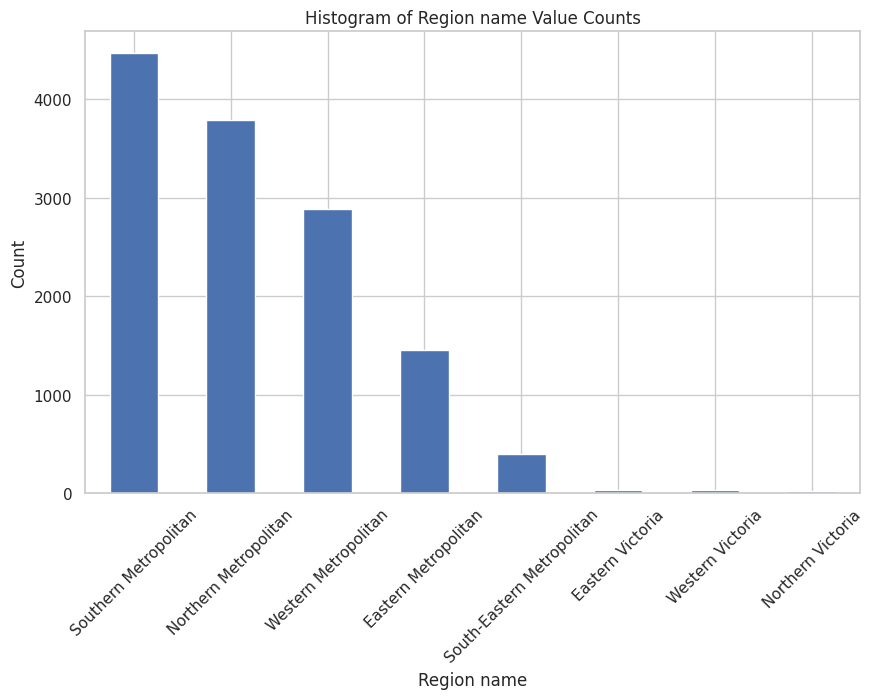

In [ ]:
#@title COLUMNA Regionname
Regionname_counts = melbcopia_categories_df.Regionname.value_counts()
# Creamos el histograma a partir de los conteos
plt.figure(figsize=(10, 6))
Regionname_counts.plot(kind='bar')

# Añadir etiquetas y título
plt.xlabel('Region name')
plt.ylabel('Count')
plt.title('Histogram of Region name Value Counts')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor claridad

# Mostrar el histograma
plt.show()

# 2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas.
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


# Vamos por pasos para realizar el Encoding
#1) seleccionamos las variables categóricas a trabajar

In [ ]:
#@title Paso 1 Variables a Trabajar 'Suburb', 'Type', 'CouncilArea', 'Regionname'
InterestingCols_categories = ['Suburb', 'Type', 'CouncilArea', 'Regionname']

#renombramos el data frame para no modificar el original
melbcopia_categories_df = melbcopia_categories_df[InterestingCols_categories]
melbcopia_categories_df.sample(5)

,Suburb,Type,CouncilArea,Regionname
8011,Port Melbourne,u,Port Phillip,Southern Metropolitan
10699,Fitzroy North,h,Yarra,Northern Metropolitan
7888,Murrumbeena,h,Glen Eira,Southern Metropolitan
2633,Footscray,u,Maribyrnong,Western Metropolitan
982,Braybrook,h,Maribyrnong,Western Metropolitan


In [ ]:
#@markdown Creamos las variables binarias con get_dummies y lo hacemos para todas las columnas
melb_dummies_df = pd.get_dummies(melbcopia_categories_df, drop_first = True) #el drop_first = True es para que elimine las columnas originales con las variables categoricas.

melb_dummies_df.sample(5)

,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,...,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_Yarra Ranges,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
12349,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2970,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
9448,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
823,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
8823,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


*Ahora* debemos concatenar las variables categoricas codificadas con las columnas de variables númericas de nuestro data frame (melbcopia_df). Como debemos utilizar numpy.hstack, debemos convertir cada data frame en un array de numpy, para ello hay que asegurarse que ambos data frame tengan el mismo número de filas.

In [ ]:
#@markdown Defino las Variables Numericas
numerical_var= ['Rooms', 'Price', 'Distance',
       'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'Lattitude', 'Longtitude', 'Propertycount']
melb_numerical_var = melb_df_ST[numerical_var]
melb_numerical_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13100 entries, 0 to 13099
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          13100 non-null  float64
 1   Price          13100 non-null  float64
 2   Distance       13100 non-null  float64
 3   Postcode       13100 non-null  float64
 4   Bedroom2       13100 non-null  float64
 5   Bathroom       13100 non-null  float64
 6   Car            13100 non-null  float64
 7   Landsize       13100 non-null  float64
 8   Lattitude      13100 non-null  float64
 9   Longtitude     13100 non-null  float64
 10  Propertycount  13100 non-null  float64
dtypes: float64(11)
memory usage: 1.1 MB


In [ ]:
melb_numerical_var.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
count,13100.000000,13100.000000,13100.000000,13100.000000,13100.000000,13100.000000,13100.000000,13100.000000,13100.000000,13100.000000,13100.000000
mean,-0.063969,0.231265,0.116621,3103.900534,-0.087252,0.522672,-0.399313,0.044329,-37.807866,144.994808,0.147871
std,0.930454,0.854572,0.813511,86.288333,0.920012,0.649761,0.921128,0.888830,0.076522,0.103018,0.733706
min,-2.000000,-0.940741,-1.164179,3000.000000,-2.000000,0.000000,-2.000000,-0.919492,-38.124770,144.542370,-1.034112
25%,-1.000000,-0.377778,-0.447761,3044.000000,-1.000000,0.000000,-1.000000,-0.542373,-37.856713,144.928345,-0.363468
50%,0.000000,0.000000,0.000000,3084.000000,0.000000,0.000000,0.000000,0.000000,-37.801100,145.000200,0.000000
75%,0.000000,0.622222,0.552239,3147.000000,0.000000,1.000000,0.000000,0.457627,-37.755150,145.058225,0.636532
max,5.000000,4.437037,4.119403,3977.000000,3.000000,3.000000,4.000000,8.993644,-37.512320,145.445300,2.538565


Ahora debemos concatenar las variables categoricas codificadas con las columnas de variables númericas de nuestra data frame (melb_numerical_var). Como debemos utilizar numpy.hstack, debemos convertir cada data frame en un array de numpy, para ello hay que asegurarse que ambos data frame tengan el mismo número de filas.

In [ ]:
print ( " filas x columnas data frame 1 =", melb_numerical_var.shape, " filas x columnas data frame 2 =", melb_dummies_df.shape)

 filas x columnas data frame 1 = (13100, 11)  filas x columnas data frame 2 = (13100, 336)


In [ ]:
#Convertimos en array los dataframe:
array_melbnumerical = melb_numerical_var.values
array_melb_dummies = melb_dummies_df.values

In [ ]:
#Contatenamos con np.hstack
concatenated_array_melb = np.hstack((array_melbnumerical, array_melb_dummies))
concatenated_array_melb_df = pd.DataFrame(concatenated_array_melb)
concatenated_array_melb_df.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,337,338,339,340,341,342,343,344,345,346
8227,0.0,0.653333,-0.417910,3071.0,0.0,1.0,0.0,-0.180085,-37.75440,144.99800,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9215,3.0,0.675556,1.104478,3168.0,3.0,2.0,2.0,0.618644,-37.91945,145.13150,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11423,-1.0,-0.325926,-1.029851,3121.0,-1.0,1.0,-1.0,-0.919492,-37.81300,144.99303,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11065,1.0,-0.488889,2.373134,3173.0,1.0,0.0,0.0,-0.105932,-37.99318,145.15939,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6739,0.0,-0.066667,0.462687,3060.0,-1.0,0.0,2.0,1.358051,-37.71560,144.97080,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1521,0.0,1.103704,-0.223881,3124.0,0.0,1.0,0.0,-0.273305,-37.83650,145.08020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8654,-2.0,-0.668148,0.313433,3204.0,-2.0,0.0,-1.0,1.211864,-37.90164,145.04139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12104,1.0,3.400000,-0.298507,3146.0,1.0,2.0,0.0,0.898305,-37.85557,145.06534,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1039,0.0,1.422222,0.283582,3186.0,0.0,1.0,0.0,-0.294492,-37.91190,145.00370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4242,0.0,0.644444,-1.044776,3051.0,0.0,0.0,-2.0,-0.743644,-37.79870,144.94970,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Vemos que haciendolo de esta forma obtenemos un data frame sin nombres de columna por lo que identificar las variables sería un incoveniente. Vamos a realizar el mismo proceso de concatenación pero ahora utilizando de Sklearn.preprocessing y la funcion OneHotEncoder. (get_dummies es solo para panda, encambio OneHotEnconder trabaja con arrays como data frames y transforma variables categoricas en vectores onehot)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
#Recordemos que la variable con las columnas categoricas del melbcopia_categories_df se llama
InterestingCols_categories
#la variable con las columnas del  melb_numerical_var se llama
numerical_var #No contiene las categoricas tmb

#En el enunciado dice: aplicar Onehotencoder a variables categoricas

# Configuramos el OneHotEncoder
enc = OneHotEncoder(categories='auto', sparse=False)

# Aplicar el OneHotEncoder a las columnas categóricas
encoded_categorical_data = enc.fit_transform(melbcopia_categories_df) #es un array

#Recordemos que tenemos el array del data frame melbcopia_df que se llama
array_melbnumerical

# Concatenar los datos codificados con los datos numéricos
combined_data = np.hstack((encoded_categorical_data, array_melbnumerical)) #tiene como argumento arrays

# Obtener los nombres de las columnas codificadas
encoded_columns = enc.get_feature_names_out(InterestingCols_categories)

# Crear el nuevo DataFrame
melb_OneHot_df = pd.DataFrame(combined_data, columns=np.append(encoded_columns, numerical_var))
#El data frame que obtuve acá tiene una fila mas que el que hice con dummies y no se pq

melb_OneHot_df.sample(5)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,...,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
2287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.770370,-0.194030,3040.0,0.0,1.0,0.0,0.529661,-37.75850,144.93170,0.457234
5877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.288889,0.597015,3020.0,0.0,0.0,-1.0,0.372881,-37.77190,144.84140,-0.390859
7414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.414815,-0.716418,3057.0,-2.0,0.0,-2.0,-0.146186,-37.76670,144.98020,-0.169719
4201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.155556,0.283582,3042.0,0.0,1.0,-1.0,-0.919492,-37.74520,144.88950,-0.714502
10462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.143704,0.910448,3131.0,0.0,0.0,0.0,0.347458,-37.80827,145.17885,-0.263821


## *El DataFrame 'melb_OneHot_df' Contiene las variables numéricas,restan YearBuilt y BuildingArea *

In [ ]:
#dimensiones del DataFrame con variables categóricas codificadas:
print("Dimensiones del DataFrame con variables categóricas codificadas", encoded_categorical_data.shape)
#dimensiones del DataFrame con variables numéricas:
print("Dimensiones del DataFrame con variables numéricas:", array_melbnumerical.shape)
#dimensiones del DataFrame con ambas variables:
print( "Dimensiones del DataFrame con ambas variables:", melb_OneHot_df.shape)
#print(concatenated_array_melb.shape)

Dimensiones del DataFrame con variables categóricas codificadas (13100, 341)
Dimensiones del DataFrame con variables numéricas: (13100, 11)
Dimensiones del DataFrame con ambas variables: (13100, 352)


## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

A continuación concatenamos el data frame codificado con las columnas BuildingArea y YearBuilt.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

# melb_data_mice es el data frame de concatenar el data frame codificado con las columnas BuildingArea y YearBuilt
melb_data_mice = pd.concat([melb_OneHot_df, melb_df_ST.YearBuilt, melb_df_ST.BuildingArea], axis=1)
melb_data_mice.sample(5)

#Belen: acá no entiendo pq en esta visualizacion me aparecen NaN que no veo si exploro la matriz (?)
#Lupe y Belu: no entendemos tu duda. A qué te referis con explorar la matriz?

#Vemos la cantidad de datos faltantes (NaN)
columna = "BuildingArea"
nan_count = melb_data_mice.isna().sum() #cuento NaN de una columna de interes
nan_count

Suburb_Abbotsford         0
Suburb_Aberfeldie         0
Suburb_Airport West       0
Suburb_Albanvale          0
Suburb_Albert Park        0
                       ... 
Lattitude                 0
Longtitude                0
Propertycount             0
YearBuilt              5178
BuildingArea           6212
Length: 354, dtype: int64

Vemos el porcentaje de datos faltantes en las nuevas columnas agregadas al data frame codificado (BuildingArea y YearBuilt)

In [ ]:
# Que cantidad de datos faltantes tenemos?

#suma de todos lo datos faltantes
celdas_totales_BA = melb_data_mice["BuildingArea"].size
faltantes_totales_BA = melb_data_mice["BuildingArea"].isna().sum()

celdas_totales_YB = melb_data_mice["YearBuilt"].size
faltantes_totales_YB = melb_data_mice["YearBuilt"].isna().sum()

#Porcentaje de datos faltantes de la columna BuildingArea
porcentaje_faltante_BA = (faltantes_totales_BA/celdas_totales_BA) * 100
print( f"{porcentaje_faltante_BA :.2f}% de la columna BuildingArea de datos son datos faltantes.")
#Porcentaje de datos faltantes de la columna YearBuilt
porcentaje_faltante_YB = (faltantes_totales_YB/celdas_totales_YB) * 100
print( f"{porcentaje_faltante_YB :.2f}% de la columna YearBuilt de datos son datos faltantes.")

47.42% de la columna BuildingArea de datos son datos faltantes.
39.53% de la columna YearBuilt de datos son datos faltantes.


# Graficos mostrando la distribución de cada variable (BuildingArea y YearBuilt) antes de ser imputada

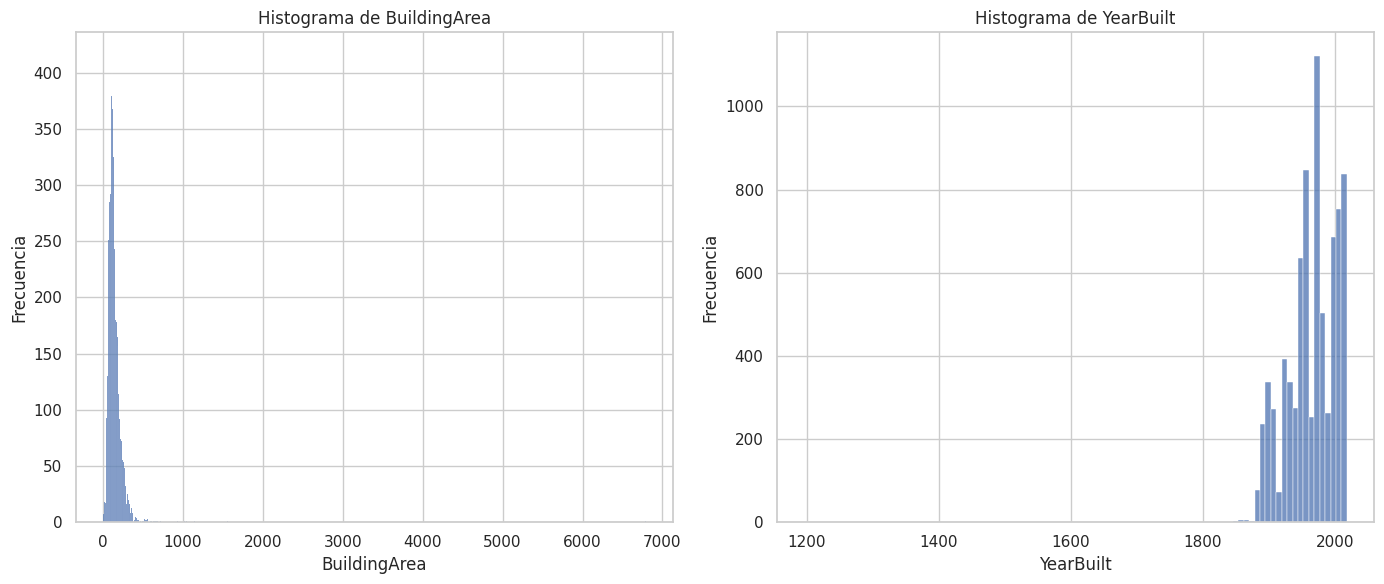

In [ ]:
# @title
sns.set_theme(style="whitegrid")


# Crear una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Crear el primer histograma en el primer subplot
sns.histplot(melb_data_mice['BuildingArea'].dropna(), bins=1000, kde=False, ax=axes[0])
axes[0].set_title('Histograma de BuildingArea')
axes[0].set_xlabel('BuildingArea')
axes[0].set_ylabel('Frecuencia')
#axes[0].set_xlim(q01BA, q99BA)  # Establecer límites entre percentilplt

# Crear el segundo histograma en el segundo subplot
sns.histplot(melb_data_mice['YearBuilt'].dropna(), bins=100, kde=False, ax=axes[1])
axes[1].set_title('Histograma de YearBuilt')
axes[1].set_xlabel('YearBuilt')
axes[1].set_ylabel('Frecuencia')
#axes[1].set_xlim(q01YB, q99YB)  # Establecer límites entre percentilplt

# Ajustar el layout para evitar solapamientos
plt.tight_layout()

# Mostrar los subplots
plt.show()

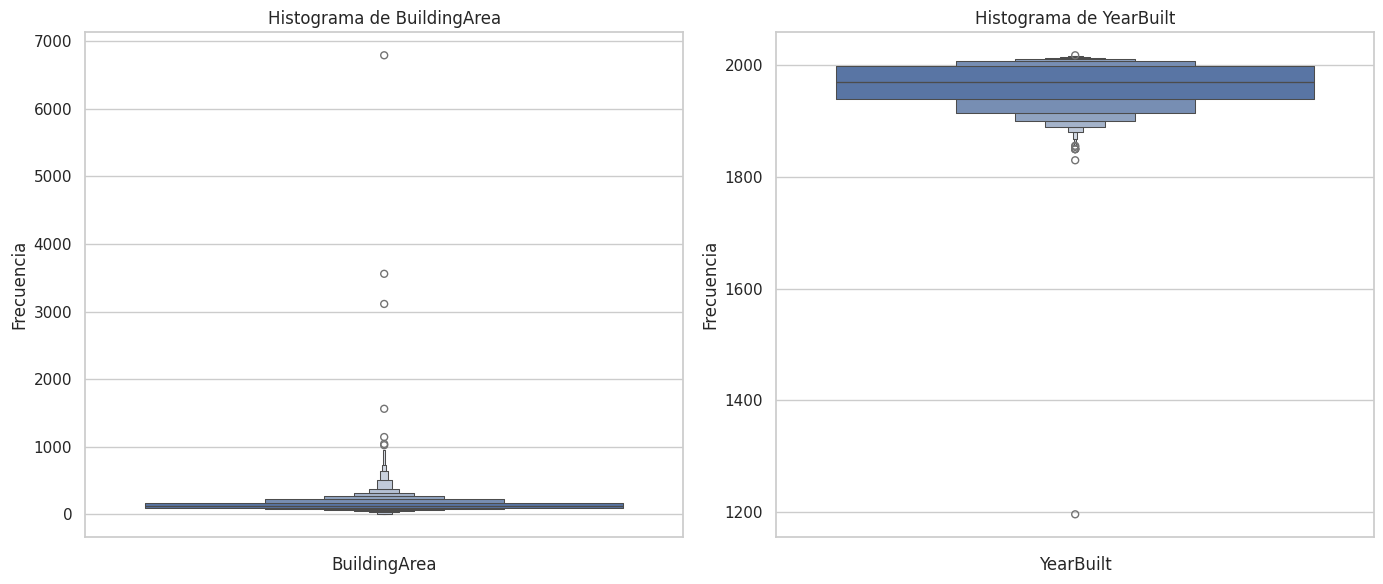

In [ ]:
# @title
sns.set_theme(style="whitegrid")


# Crear una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Crear el primer histograma en el primer subplot
sns.boxenplot(melb_data_mice['BuildingArea'].dropna(),  ax=axes[0])
axes[0].set_title('Histograma de BuildingArea')
axes[0].set_xlabel('BuildingArea')
axes[0].set_ylabel('Frecuencia')
#axes[0].set_xlim(q01BA, q99BA)  # Establecer límites entre percentilplt

# Crear el segundo histograma en el segundo subplot
sns.boxenplot(melb_data_mice['YearBuilt'].dropna(),  ax=axes[1])
axes[1].set_title('Histograma de YearBuilt')
axes[1].set_xlabel('YearBuilt')
axes[1].set_ylabel('Frecuencia')
#axes[1].set_xlim(q01YB, q99YB)  # Establecer límites entre percentilplt

# Ajustar el layout para evitar solapamientos
plt.tight_layout()

# Mostrar los subplots
plt.show()

# Vemos que tenemos outliers para ambas columnas por lo que vamos a utilizar los quantiles para eliminarlos.


In [ ]:
q99BA = melb_data_mice['BuildingArea'].quantile(0.99)
q01YB = melb_data_mice['YearBuilt'].quantile(0.01)
q01BA = melb_data_mice['BuildingArea'].quantile(0.01)
q99YB = melb_data_mice['YearBuilt'].quantile(0.99)

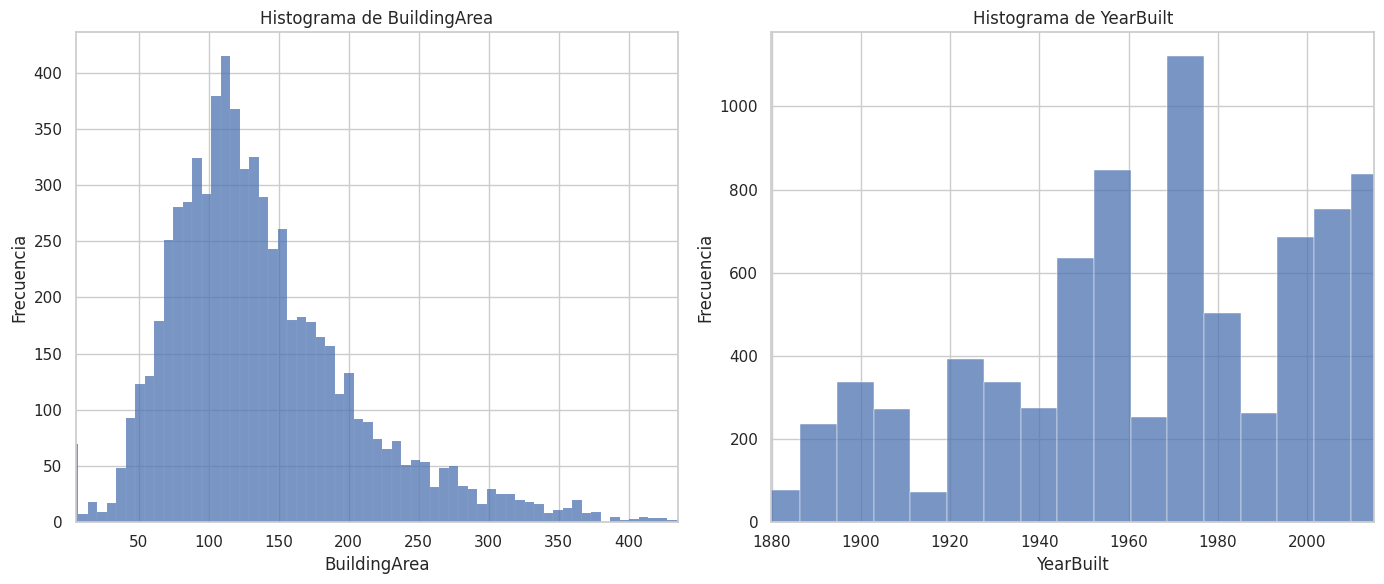

In [ ]:
# @title
sns.set_theme(style="whitegrid")


# Crear una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Crear el primer histograma en el primer subplot
sns.histplot(melb_data_mice['BuildingArea'].dropna(), bins=1000, kde=False, ax=axes[0])
axes[0].set_title('Histograma de BuildingArea')
axes[0].set_xlabel('BuildingArea')
axes[0].set_ylabel('Frecuencia')
axes[0].set_xlim(q01BA, q99BA)  # Establecer límites entre percentilplt

# Crear el segundo histograma en el segundo subplot
sns.histplot(melb_data_mice['YearBuilt'].dropna(), bins=100, kde=False, ax=axes[1])
axes[1].set_title('Histograma de YearBuilt')
axes[1].set_xlabel('YearBuilt')
axes[1].set_ylabel('Frecuencia')
axes[1].set_xlim(q01YB, q99YB)  # Establecer límites entre percentilplt

# Ajustar el layout para evitar solapamientos
plt.tight_layout()

# Mostrar los subplots
plt.show()

# **Ahorra evaluaremos distinto tipo de Imputaciones**

Realizamos la imputacion a las columnas BuildingArea y YearBuilt. En primer instancia utilizaremos el IterativeImputer con el estimador KNeighborsRegressor.

In [ ]:
#Imputador IterativeImputer
mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
#hacemos una copia del data frame melb_data_mice
melb_data_miceIm = melb_data_mice.copy()
#Imputamos el data frame
melb_data_miceIm[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(melb_data_miceIm[['YearBuilt', 'BuildingArea']])
melb_data_miceIm.sample(5)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,...,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,YearBuilt,BuildingArea
7390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3056.0,-2.0,0.0,-1.0,2.052966,-37.75910,144.95770,0.903210,1943.0,163.4
2315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3040.0,-1.0,0.0,-1.0,-0.919492,-37.75040,144.90510,0.457234,1970.0,146.4
92,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3206.0,0.0,1.0,-1.0,-0.544492,-37.84150,144.95850,-0.548311,1880.0,181.0
11026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3131.0,-1.0,0.0,-1.0,0.311441,-37.84207,145.17795,-0.362628,1970.0,116.4
1095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3186.0,0.0,0.0,-1.0,-0.694915,-37.91590,144.99360,0.678205,1975.0,168.8


In [ ]:
#@title Control de datos faltantes.
#Vemos la cantidad de datos faltantes (NaN)
columna = "BuildingArea"
nan_count = melb_data_miceIm.isna().sum() #cuento NaN de una columna de interes
nan_count

Suburb_Abbotsford      0
Suburb_Aberfeldie      0
Suburb_Airport West    0
Suburb_Albanvale       0
Suburb_Albert Park     0
                      ..
Lattitude              0
Longtitude             0
Propertycount          0
YearBuilt              0
BuildingArea           0
Length: 354, dtype: int64

# Graficos mostrando la distribución de cada variable (BuildingArea y YearBuilt) luego de ser imputada con IterativeImputer

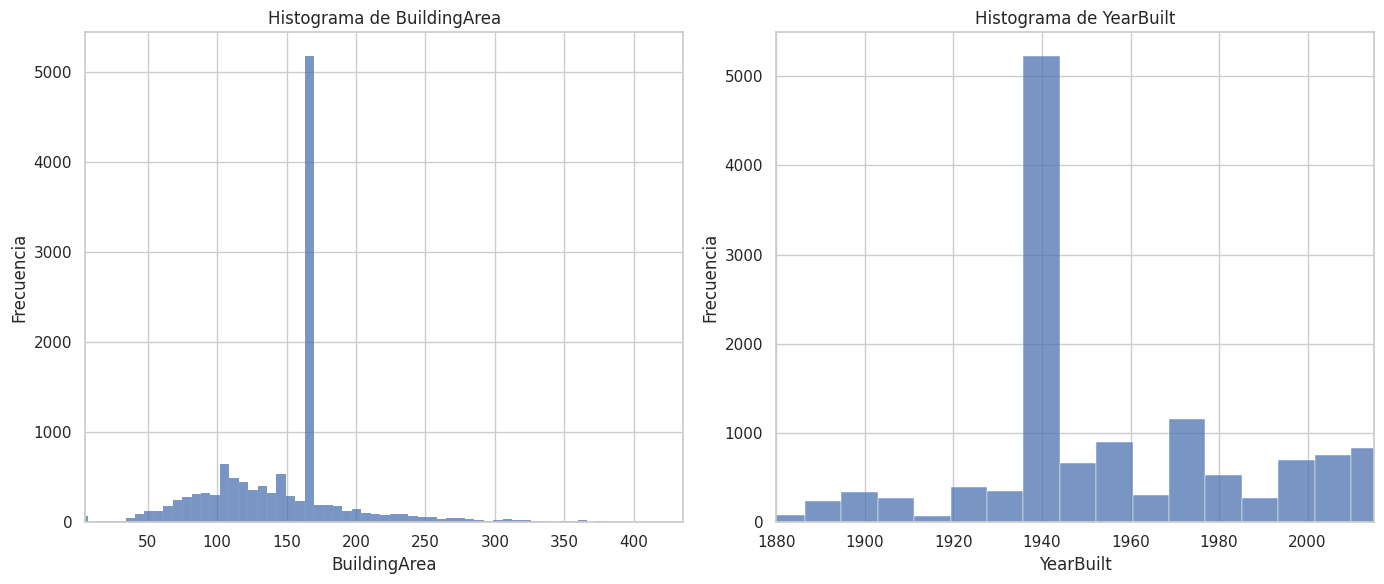

In [ ]:
# @title
sns.set_theme(style="whitegrid")

# Crear una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Crear el primer histograma en el primer subplot
sns.histplot(melb_data_miceIm['BuildingArea'], bins=1000, kde=False, ax=axes[0])
axes[0].set_title('Histograma de BuildingArea')
axes[0].set_xlabel('BuildingArea')
axes[0].set_ylabel('Frecuencia')
#axes[0].set_xlim(0, 1000)
axes[0].set_xlim(q01BA, q99BA)

# Crear el segundo histograma en el segundo subplot
sns.histplot(melb_data_miceIm['YearBuilt'], bins=100, kde=False, ax=axes[1])
axes[1].set_title('Histograma de YearBuilt')
axes[1].set_xlabel('YearBuilt')
axes[1].set_ylabel('Frecuencia')
#axes[1].set_xlim(1800, 2000)
axes[1].set_xlim(q01YB, q99YB)
# Ajustar el layout para evitar solapamientos
plt.tight_layout()

# Mostrar los subplots
plt.show()

# Imputacion 2: KNNImputer
Realizamos la imputacion a las columnas BuildingArea y YearBuilt. En este caso utilizaremos el KNNImputer.

In [ ]:
from sklearn.impute import KNNImputer
#Copio el data frame
melb_data_miceKnn = melb_data_mice.copy()
#Establezco el imputador
knn_imputer = KNNImputer(n_neighbors=1, weights="uniform")

In [ ]:
melb_data_miceKnn

,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,...,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,YearBuilt,BuildingArea
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3067.0,-1.0,0.0,-1.0,-0.491525,-37.79960,144.99840,-0.424130,NaN,NaN
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3067.0,-1.0,0.0,-2.0,-0.588983,-37.80790,144.99340,-0.424130,1900.0,79.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3067.0,0.0,1.0,-2.0,-0.635593,-37.80930,144.99440,-0.424130,1900.0,150.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3067.0,0.0,1.0,-1.0,-0.720339,-37.79690,144.99690,-0.424130,NaN,NaN
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3067.0,0.0,0.0,0.0,-0.665254,-37.80720,144.99410,-0.424130,2014.0,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3150.0,1.0,1.0,0.0,0.461864,-37.90562,145.16761,0.142665,1981.0,NaN
13096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3016.0,0.0,1.0,0.0,-0.213983,-37.85927,144.87904,-0.027390,1995.0,133.0
13097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3016.0,0.0,1.0,2.0,0.004237,-37.85274,144.88738,-0.027390,1997.0,NaN
13098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3016.0,1.0,0.0,3.0,0.915254,-37.85908,144.89299,-0.027390,1920.0,157.0


In [ ]:
# Get the number of columns
num_columns = melb_data_miceKnn.shape[1]

# Print the number of columns
print("Number of columns:", num_columns)

Number of columns: 354


In [ ]:
#Imputamos solo las columnas BuildingArea y YearBuilt del dataframe
result = knn_imputer.fit_transform(melb_data_miceKnn)
melb_data_miceKnn.iloc[:,[352,353]] = result[:,[352,353]]
melb_data_miceKnn.iloc[:,[352,353]]


# Detect columns with any NaN values
columns_with_nan = melb_data_miceKnn.columns[melb_data_miceKnn.isna().any()].tolist()

# Print the columns that contain NaN values
print("Columns with NaN values:", columns_with_nan)


Columns with NaN values: []


# # Graficos mostrando la distribución de cada variable (BuildingArea y YearBuilt) luego de ser imputada con KNNImputer

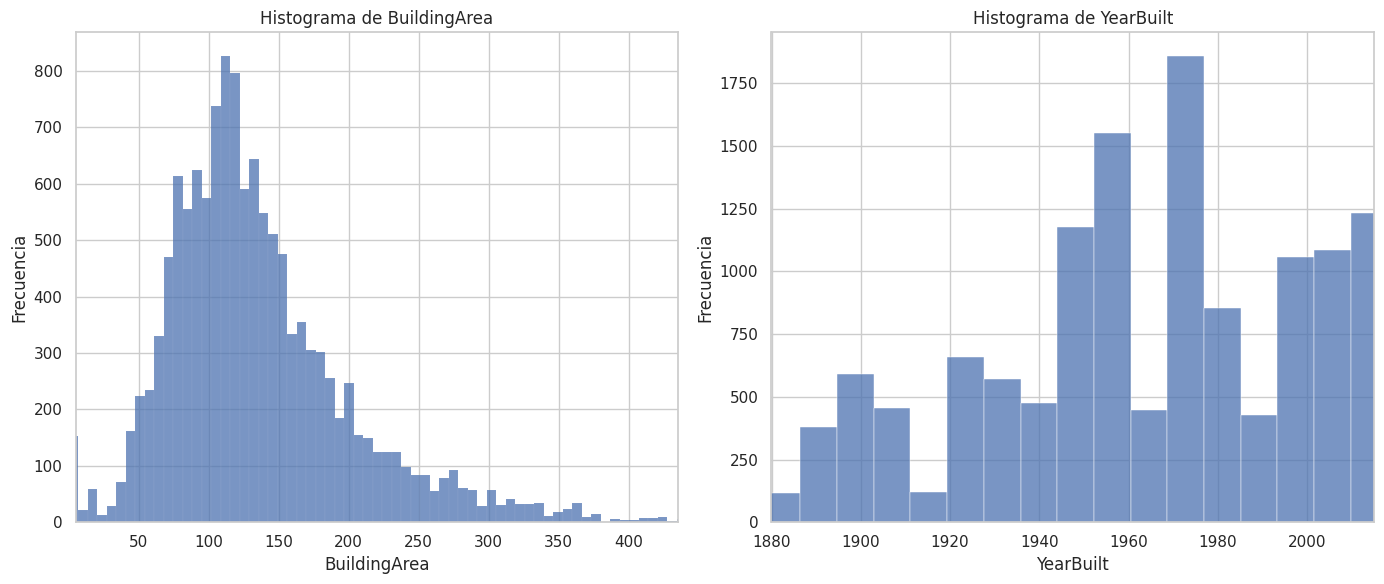

In [ ]:
# @title
sns.set_theme(style="whitegrid")

# Crear una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Crear el primer histograma en el primer subplot
sns.histplot(melb_data_miceKnn['BuildingArea'], bins=1000, kde=False, ax=axes[0])#, log_scale=True)
axes[0].set_title('Histograma de BuildingArea')
axes[0].set_xlabel('BuildingArea')
axes[0].set_ylabel('Frecuencia')
axes[0].set_xlim(q01BA, q99BA)
# Crear el segundo histograma en el segundo subplot
sns.histplot(melb_data_miceKnn['YearBuilt'], bins=100, kde=False, ax=axes[1])#, log_scale=True)
axes[1].set_title('Histograma de YearBuilt')
axes[1].set_xlabel('YearBuilt')
axes[1].set_ylabel('Frecuencia')
axes[1].set_xlim(q01YB, q99YB)
# Ajustar el layout para evitar solapamientos
plt.tight_layout()

# Mostrar los subplots
plt.show()

# Comparación entre graficos de las distribuciones sin imputar e imputando con los métodos IterativeImpuer y KNNImputer

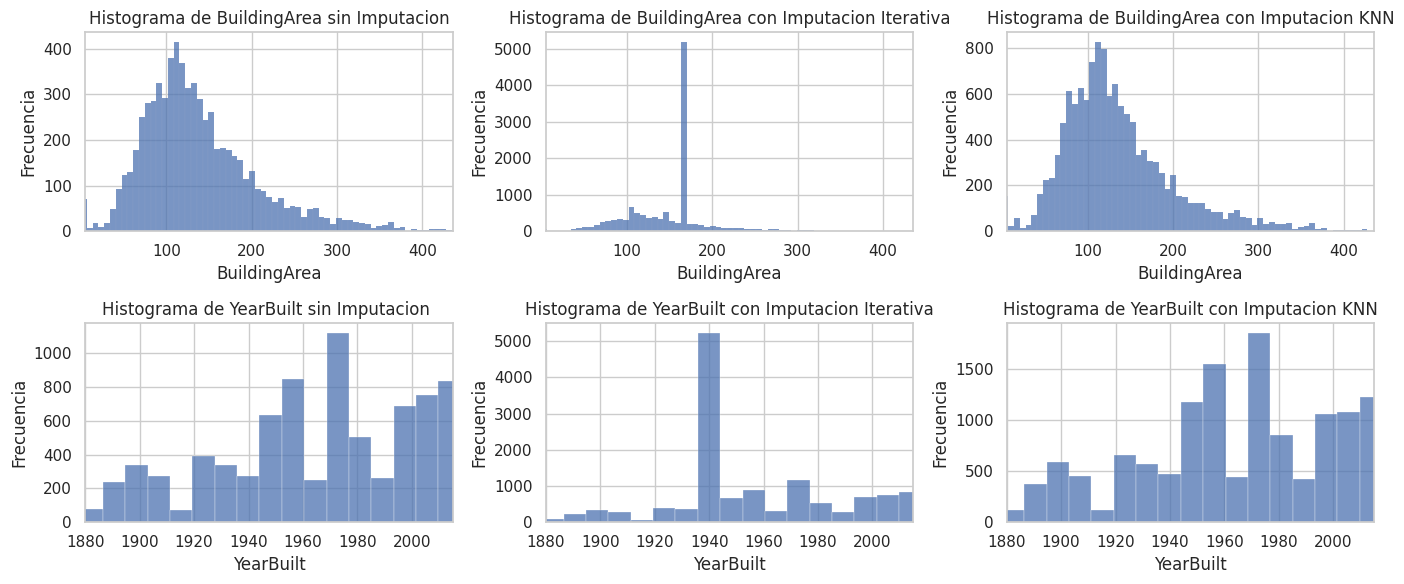

In [ ]:
# @title
sns.set_theme(style="whitegrid")

# Crear una figura con dos subplots
fig, axes = plt.subplots(2, 3, figsize=(14, 6))

# Crear el primer histograma en el primer subplot
sns.histplot(melb_data_mice['BuildingArea'], bins=1000, kde=False, ax=axes[0,0])
axes[0,0].set_title('Histograma de BuildingArea sin Imputacion')
axes[0,0].set_xlabel('BuildingArea')
axes[0,0].set_ylabel('Frecuencia')
axes[0,0].set_xlim(q01BA, q99BA)
# Crear el segundo histograma en el segundo subplot
sns.histplot(melb_data_miceIm['BuildingArea'], bins=1000, kde=False, ax=axes[0,1])
axes[0,1].set_title('Histograma de BuildingArea con Imputacion Iterativa')
axes[0,1].set_xlabel('BuildingArea')
axes[0,1].set_ylabel('Frecuencia')
axes[0,1].set_xlim(q01BA, q99BA)  # Establecer límites entre percentilplt


sns.histplot(melb_data_miceKnn['BuildingArea'], bins=1000, kde=False, ax=axes[0,2])
axes[0,2].set_title('Histograma de BuildingArea con Imputacion KNN')
axes[0,2].set_xlabel('BuildingArea')
axes[0,2].set_ylabel('Frecuencia')
axes[0,2].set_xlim(q01BA, q99BA)  # Establecer límites entre percentilplt


sns.histplot(melb_data_mice['YearBuilt'], bins=100, kde=False, ax=axes[1,0])#, log_scale=True)
axes[1,0].set_title('Histograma de YearBuilt sin Imputacion ')
axes[1,0].set_xlabel('YearBuilt')
axes[1,0].set_ylabel('Frecuencia')
axes[1,0].set_xlim(q01YB, q99YB)

sns.histplot(melb_data_miceIm['YearBuilt'], bins=100, kde=False, ax=axes[1,1])#, log_scale=True)
axes[1,1].set_title('Histograma de YearBuilt con Imputacion Iterativa')
axes[1,1].set_xlabel('YearBuilt')
axes[1,1].set_ylabel('Frecuencia')
axes[1,1].set_xlim(q01YB, q99YB)

sns.histplot(melb_data_miceKnn['YearBuilt'], bins=100, kde=False, ax=axes[1,2])#, log_scale=True)
axes[1,2].set_title('Histograma de YearBuilt con Imputacion KNN')
axes[1,2].set_xlabel('YearBuilt')
axes[1,2].set_ylabel('Frecuencia')
axes[1,2].set_xlim(q01YB, q99YB)

# Ajustar el layout para evitar solapamientos
plt.tight_layout()

# Mostrar los subplots
plt.show()

# **Conclusiones**

## Viendo los graficos se puede concluir que la imputación **KNN** mantiene la distribución original (columnas sin imputar), no así la imputación iterativa.

# Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:

Aplique PCA para obtener  𝑛  componentes principales de la matriz, donde n = min(20, X.shape[0]). ¿Es necesario estandarizar o escalar los datos?
Seleccione las primeras  2  columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

# Aplicamos PCA
A continuación aplicamos PCA con n componentes principales donde n se define como:
n = min(20,X_array.shape[0])
También imprimimos en pantalla algunos datos de interes.

**1) Seleccionar las Variables Numéricas de importancia para el Análisis PCA**
- Descartamos las variables Numéricas:

LandSize

Postcode

Latitud

Longitud

**2) Transformar los datos numéricos para eviatar problemas de sesgo en el Análisis PCA por diferencias en la magnitud de distintas variables**
- Hay que realizar Transformaciones en las columnas:

YearBuilt

BuildingArea

In [ ]:
#@title Paso 1 Crear el nuevo DataFrame sin la Información de LandSize, Postcode, Latitud, Longitud
columns_to_remove = ['Postcode', 'Landsize', 'Lattitude','Longtitude', 'YearBuilt', 'BuildingArea']
melb_OneHot_df_1 = melb_OneHot_df.drop(columns=[col for col in columns_to_remove if col in melb_OneHot_df.columns])

#melb_OneHot_df.info()
melb_OneHot_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13100 entries, 0 to 13099
Columns: 352 entries, Suburb_Abbotsford to Propertycount
dtypes: float64(352)
memory usage: 35.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13100 entries, 0 to 13099
Columns: 348 entries, Suburb_Abbotsford to Propertycount
dtypes: float64(348)
memory usage: 34.8 MB


In [ ]:
#@title Paso 2: Transformar los valores YearBuilt y BuildingArea con RobustScaler
YB_BA_columns = ['YearBuilt', 'BuildingArea']

scaled_YB_BA = scaler2.fit_transform(melb_data_miceKnn[YB_BA_columns])
df_scaled_YB_BA = pd.DataFrame(scaled_YB_BA, columns=YB_BA_columns)


df_scaled_all_important = pd.concat([df_scaled_YB_BA, melb_OneHot_df_1.reset_index(drop=True)], axis=1)

df_scaled_all_important.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13100 entries, 0 to 13099
Columns: 350 entries, YearBuilt to Propertycount
dtypes: float64(350)
memory usage: 35.0 MB


## Creamos el DataFrame "df_scaled_all_important" que emplearemos para el análisis de PCA

In [ ]:
df_scaled_all_important.columns

Index(['YearBuilt', 'BuildingArea', 'Suburb_Abbotsford', 'Suburb_Aberfeldie',
       'Suburb_Airport West', 'Suburb_Albanvale', 'Suburb_Albert Park',
       'Suburb_Albion', 'Suburb_Alphington', 'Suburb_Altona',
       ...
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria', 'Rooms', 'Price', 'Distance', 'Bedroom2',
       'Bathroom', 'Car', 'Propertycount'],
      dtype='object', length=350)

In [ ]:
from sklearn.decomposition import PCA

# Definir el número de componentes principales
n = min(20, df_scaled_all_important.shape[0])

# Aplicar PCA
pca = PCA(n_components=n)
principal_components = pca.fit_transform(df_scaled_all_important)

In [ ]:
# Crear un DataFrame con las dos primeras componentes principales
pca_df = pd.DataFrame(data=principal_components[:, :2], columns=['PCA1', 'PCA2'])

# Agregar las componentes principales al conjunto de datos original (con imputaciones)
final_df = df_scaled_all_important.reset_index(drop=True)
final_df_PCA = pd.concat([final_df, pca_df], axis=1)

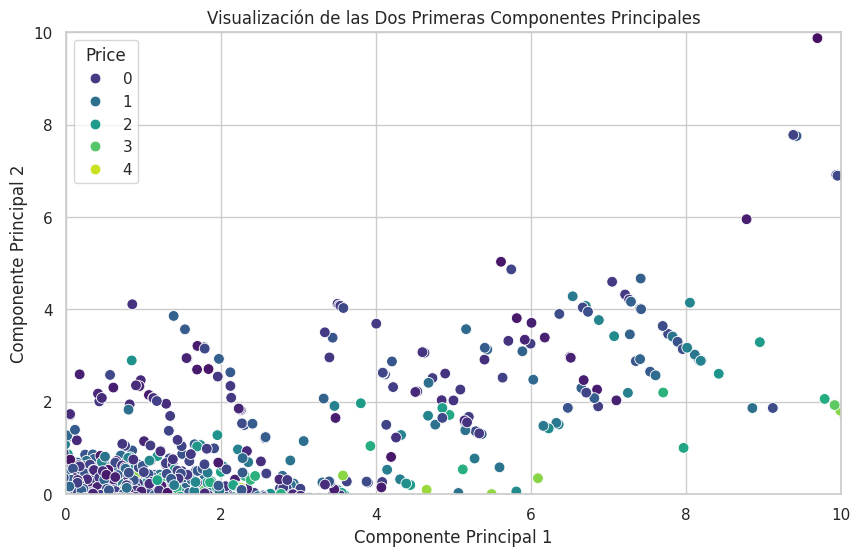

In [ ]:
# Crear el gráfico de dispersión de las dos primeras componentes principales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=final_df_PCA, hue='Price', palette='viridis', s=60)
plt.title('Visualización de las Dos Primeras Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.xlim([0, 10])
plt.ylim([0,10])
plt.grid(True)
plt.show()

In [ ]:
#@title ¿Qué sucedería si eliminamos la variable Suburb del análisis PCA?
# Identify columns to exclude
exclude_suburb = [colS for colS in df_scaled_all_important.columns if colS.startswith('Suburb_')]

# Drop the identified columns
df_scaled_all_important_NS = df_scaled_all_important.drop(columns=exclude_suburb)

df_scaled_all_important_NS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13100 entries, 0 to 13099
Data columns (total 52 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   YearBuilt                              13100 non-null  float64
 1   BuildingArea                           13100 non-null  float64
 2   Type_h                                 13100 non-null  float64
 3   Type_t                                 13100 non-null  float64
 4   Type_u                                 13100 non-null  float64
 5   CouncilArea_Banyule                    13100 non-null  float64
 6   CouncilArea_Bayside                    13100 non-null  float64
 7   CouncilArea_Boroondara                 13100 non-null  float64
 8   CouncilArea_Brimbank                   13100 non-null  float64
 9   CouncilArea_Cardinia                   13100 non-null  float64
 10  CouncilArea_Casey                      13100 non-null  float64
 11  Co

In [ ]:

# Definir el número de componentes principales
n = min(20, df_scaled_all_important_NS.shape[0])

# Aplicar PCA
pca = PCA(n_components=n)
principal_components_NS = pca.fit_transform(df_scaled_all_important_NS)

# Crear un DataFrame con las dos primeras componentes principales
pca_df_NS = pd.DataFrame(data=principal_components_NS[:, :2], columns=['PCA1_NS', 'PCA2_NS'])

# Agregar las componentes principales al conjunto de datos original (con imputaciones)
#final_df_NS = df_scaled_all_important.reset_index(drop=True)
#final_df_NS = pd.concat([final_df, pca_df_NS], axis=1)



In [ ]:
final_df_NS = df_scaled_all_important.reset_index(drop=True)
final_df_NS = pd.concat([final_df, pca_df_NS], axis=1)

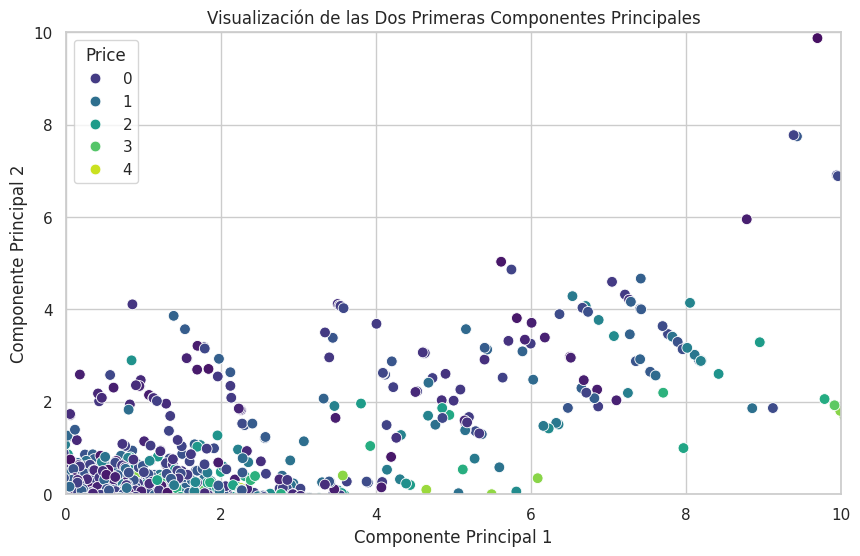

In [ ]:
# Crear el gráfico de dispersión de las dos primeras componentes principales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1_NS', y='PCA2_NS', data=final_df_NS, hue='Price', palette='viridis', s=60)
plt.title('Visualización de las Dos Primeras Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.xlim([0, 10])
plt.ylim([0,10])
plt.grid(True)
plt.show()

# Voy a seguir probando distintas variables de matrices de Datos para hacer el PCA



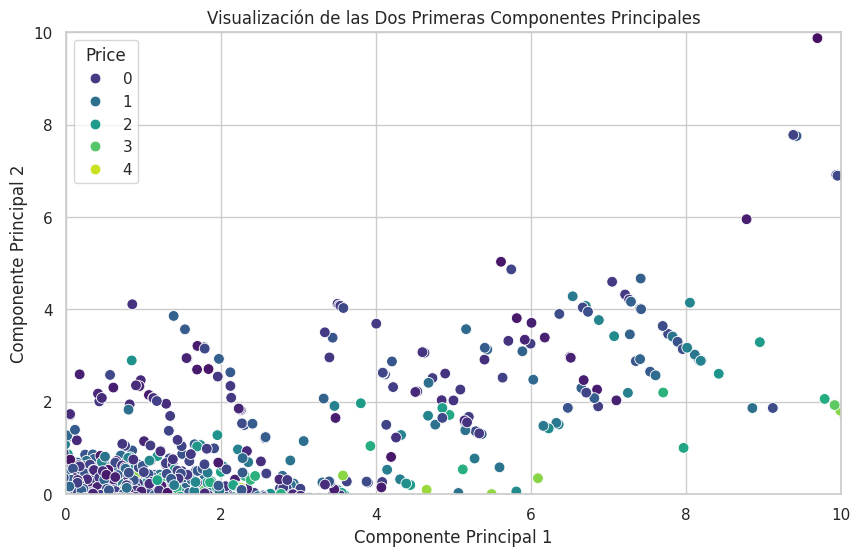

In [ ]:
#@title Qué Pasa si incluimos el 'Landsize' Todas las variables "_P1"
#@title Paso 1 Crear el nuevo DataFrame sin la Información de LandSize, Postcode, Latitud, Longitud
columns_to_remove_P1 = ['Postcode', 'Lattitude','Longtitude', 'YearBuilt', 'BuildingArea']
melb_OneHot_df_1_P1 = melb_OneHot_df.drop(columns=[col for col in columns_to_remove if col in melb_OneHot_df.columns])

#melb_OneHot_df.info()
#melb_OneHot_df_1_P1.info()

# Le sumo las columnas de YearBuilt y BuildingArea
df_scaled_all_important_P1 = pd.concat([df_scaled_YB_BA, melb_OneHot_df_1_P1.reset_index(drop=True)], axis=1)

#df_scaled_all_important_P1.info()

# Ahora viene PCA
# Definir el número de componentes principales
n = min(20, df_scaled_all_important_P1.shape[0])

# Aplicar PCA
pca = PCA(n_components=n)
principal_components_P1 = pca.fit_transform(df_scaled_all_important_P1)


# Crear un DataFrame con las dos primeras componentes principales
pca_df_P1 = pd.DataFrame(data=principal_components_P1[:, :2], columns=['PCA1_P1', 'PCA2_P1'])

# Agregar las componentes principales al conjunto de datos original (con imputaciones)
final_df_P1 = df_scaled_all_important_P1.reset_index(drop=True)
final_df_PCA_P1 = pd.concat([final_df_P1, pca_df_P1], axis=1)

# Crear el gráfico de dispersión de las dos primeras componentes principales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1_P1', y='PCA2_P1', data=final_df_PCA_P1, hue='Price', palette='viridis', s=60)
plt.title('Visualización de las Dos Primeras Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.xlim([0, 10])
plt.ylim([0,10])
plt.grid(True)
plt.show()


In [ ]:
#@title ¿Qué sucedería si eliminamos la variable Suburb del análisis PCA?
# Identify columns to exclude
exclude_suburb_P2 = [colS for colS in df_scaled_all_important.columns if colS.startswith('Suburb_')]

exclude_CouncilArea = [colS for colS in df_scaled_all_important.columns if colS.startswith('CouncilArea_')]

# Drop the identified columns
df_scaled_all_important_NS = df_scaled_all_important.drop(columns=exclude_suburb)

df_scaled_all_important_NS_NCA = df_scaled_all_important_NS.drop(columns=exclude_CouncilArea)

columns_to_remove_P2 = ['YearBuilt', 'BuildingArea']

melb_OneHot_df_1_P2 = df_scaled_all_important_NS_NCA.drop(columns=[col_P2 for col_P2 in columns_to_remove_P2 if col_P2 in df_scaled_all_important_NS_NCA.columns])


melb_OneHot_df_1_P2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13100 entries, 0 to 13099
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Type_h                                 13100 non-null  float64
 1   Type_t                                 13100 non-null  float64
 2   Type_u                                 13100 non-null  float64
 3   Regionname_Eastern Metropolitan        13100 non-null  float64
 4   Regionname_Eastern Victoria            13100 non-null  float64
 5   Regionname_Northern Metropolitan       13100 non-null  float64
 6   Regionname_Northern Victoria           13100 non-null  float64
 7   Regionname_South-Eastern Metropolitan  13100 non-null  float64
 8   Regionname_Southern Metropolitan       13100 non-null  float64
 9   Regionname_Western Metropolitan        13100 non-null  float64
 10  Regionname_Western Victoria            13100 non-null  float64
 11  Ro

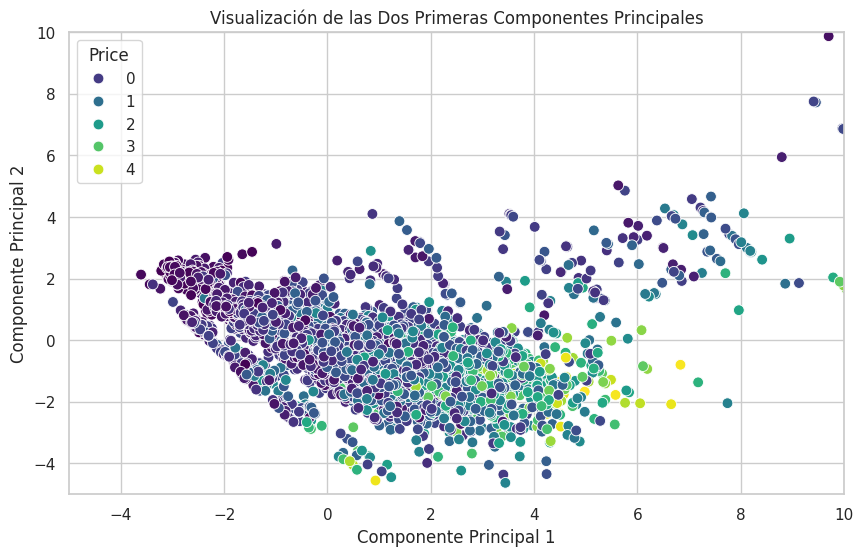

In [ ]:
#@title Qué Pasa si vamos agregando columnas de a Poco en el PCA
# Identify columns to exclude
exclude_suburb_P2 = [colS for colS in df_scaled_all_important.columns if colS.startswith('Suburb_')]

exclude_CouncilArea = [colS for colS in df_scaled_all_important.columns if colS.startswith('CouncilArea_')]

# Drop the identified columns
df_scaled_all_important_NS = df_scaled_all_important.drop(columns=exclude_suburb)

df_scaled_all_important_NS_NCA = df_scaled_all_important_NS.drop(columns=exclude_CouncilArea)

columns_to_remove_P2 = ['YearBuilt', 'BuildingArea']

melb_OneHot_df_1_P2 = df_scaled_all_important_NS_NCA.drop(columns=[col_P2 for col_P2 in columns_to_remove_P2 if col_P2 in df_scaled_all_important_NS_NCA.columns])


#melb_OneHot_df_1_P2.info()


# Le sumo las columnas de YearBuilt y BuildingArea
df_scaled_all_important_P2 = pd.concat([df_scaled_YB_BA, melb_OneHot_df_1_P2.reset_index(drop=True)], axis=1)

#df_scaled_all_important_P1.info()

# Ahora viene PCA
# Definir el número de componentes principales
n = min(10, df_scaled_all_important_P2.shape[0])

# Aplicar PCA
pca = PCA(n_components=n)
principal_components_P2 = pca.fit_transform(df_scaled_all_important_P2)


# Crear un DataFrame con las dos primeras componentes principales
pca_df_P2 = pd.DataFrame(data=principal_components_P2[:, :2], columns=['PCA1_P2', 'PCA2_P2'])

# Agregar las componentes principales al conjunto de datos original (con imputaciones)
final_df_P2 = df_scaled_all_important_P2.reset_index(drop=True)
final_df_PCA_P2 = pd.concat([final_df_P2, pca_df_P2], axis=1)

# Crear el gráfico de dispersión de las dos primeras componentes principales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1_P2', y='PCA2_P2', data=final_df_PCA_P2, hue='Price', palette='viridis', s=60)
plt.title('Visualización de las Dos Primeras Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.xlim([-5, 10])
plt.ylim([-5,10])
plt.grid(True)
plt.show()


In [ ]:
#@title Qué Pasa si vamos agregando columnas de a Poco en el PCA
# Identify columns to exclude
exclude_suburb_P3 = [colS for colS in df_scaled_all_important.columns if colS.startswith('Suburb_')]

exclude_CouncilArea = [colS for colS in df_scaled_all_important.columns if colS.startswith('CouncilArea_')]

exclude_Regionname = [colS for colS in df_scaled_all_important.columns if colS.startswith('Regionname_')]


# Drop the identified columns
df_scaled_all_important_NS = df_scaled_all_important.drop(columns=exclude_suburb)

df_scaled_all_important_NS_NCA = df_scaled_all_important_NS.drop(columns=exclude_CouncilArea)
df_scaled_all_important_NS_NCA.info()

#df_scaled_all_important_NS_NCA_RN = df_scaled_all_important_NS.drop(columns=exclude_Regionname)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13100 entries, 0 to 13099
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   YearBuilt                              13100 non-null  float64
 1   BuildingArea                           13100 non-null  float64
 2   Type_h                                 13100 non-null  float64
 3   Type_t                                 13100 non-null  float64
 4   Type_u                                 13100 non-null  float64
 5   Regionname_Eastern Metropolitan        13100 non-null  float64
 6   Regionname_Eastern Victoria            13100 non-null  float64
 7   Regionname_Northern Metropolitan       13100 non-null  float64
 8   Regionname_Northern Victoria           13100 non-null  float64
 9   Regionname_South-Eastern Metropolitan  13100 non-null  float64
 10  Regionname_Southern Metropolitan       13100 non-null  float64
 11  Re

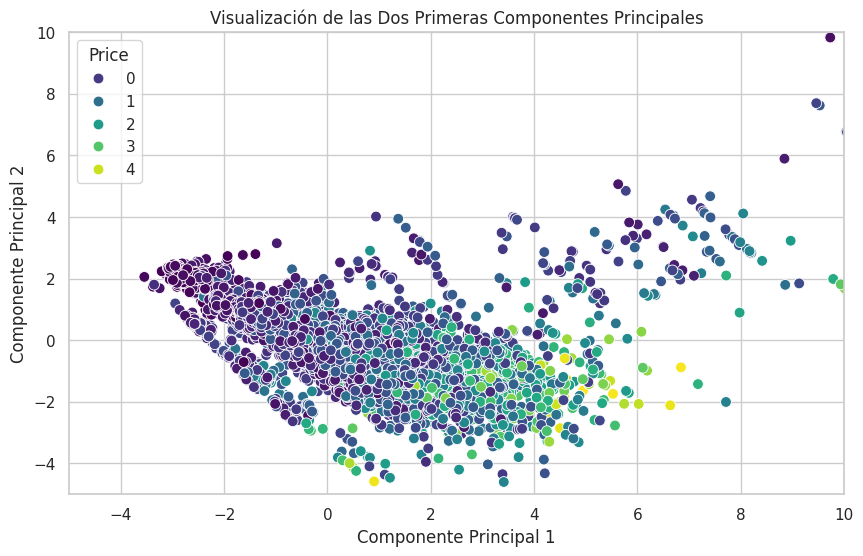

In [ ]:
#@title Qué Pasa si vamos agregando columnas de a Poco en el PCA
# Identify columns to exclude
exclude_suburb_P3 = [colS for colS in df_scaled_all_important.columns if colS.startswith('Suburb_')]

exclude_CouncilArea = [colS for colS in df_scaled_all_important.columns if colS.startswith('CouncilArea_')]

exclude_Regionname = [colS for colS in df_scaled_all_important.columns if colS.startswith('Regionname_')]


# Drop the identified columns
df_scaled_all_important_NS = df_scaled_all_important.drop(columns=exclude_suburb)

df_scaled_all_important_NS_NCA = df_scaled_all_important_NS.drop(columns=exclude_CouncilArea)

df_scaled_all_important_NS_NCA_RN = df_scaled_all_important_NS_NCA.drop(columns=exclude_Regionname)


columns_to_remove_P3 = ['Propertycount','YearBuilt', 'BuildingArea']

melb_OneHot_df_1_P3 = df_scaled_all_important_NS_NCA_RN.drop(columns=[col_P2 for col_P2 in columns_to_remove_P3 if col_P2 in df_scaled_all_important_NS_NCA_RN.columns])


#melb_OneHot_df_1_P2.info()


# Le sumo las columnas de YearBuilt y BuildingArea
df_scaled_all_important_P3 = pd.concat([df_scaled_YB_BA, melb_OneHot_df_1_P3.reset_index(drop=True)], axis=1)

#df_scaled_all_important_P1.info()

# Ahora viene PCA
# Definir el número de componentes principales
n = min(4, df_scaled_all_important_P3.shape[0])

# Aplicar PCA
pca = PCA(n_components=2)
principal_components_P3 = pca.fit_transform(df_scaled_all_important_P3)


# Crear un DataFrame con las dos primeras componentes principales
pca_df_P3 = pd.DataFrame(data=principal_components_P3[:, :2], columns=['PCA1_P3', 'PCA2_P3'])

# Agregar las componentes principales al conjunto de datos original (con imputaciones)
final_df_P3 = df_scaled_all_important_P3.reset_index(drop=True)
final_df_PCA_P3 = pd.concat([final_df_P3, pca_df_P3], axis=1)

final_df_PCA_P3.describe()
# Crear el gráfico de dispersión de las dos primeras componentes principales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1_P3', y='PCA2_P3', data=final_df_PCA_P3, hue='Price', palette='viridis', s=60)
plt.title('Visualización de las Dos Primeras Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.xlim([-5, 10])
plt.ylim([-5,10])
plt.grid(True)
plt.show()


In [ ]:
final_df_PCA_P3.describe()


,YearBuilt,BuildingArea,Type_h,Type_t,Type_u,Rooms,Price,Distance,Bedroom2,Bathroom,Car,PCA1_P3,PCA2_P3
count,13100.000000,13100.000000,13100.000000,13100.000000,13100.000000,13100.000000,13100.000000,13100.000000,13100.000000,13100.000000,13100.000000,1.310000e+04,1.310000e+04
mean,-0.091685,0.273450,0.698779,0.084351,0.216870,-0.063969,0.231265,0.116621,-0.087252,0.522672,-0.399313,-5.207031e-17,1.735677e-17
std,0.675455,1.884852,0.458806,0.277924,0.412129,0.930454,0.854572,0.813511,0.920012,0.649761,0.921128,2.070476e+00,1.332762e+00
min,-14.036364,-1.662162,0.000000,0.000000,0.000000,-2.000000,-0.940741,-1.164179,-2.000000,0.000000,-2.000000,-3.544840e+00,-5.533584e+00
25%,-0.509091,-0.405405,0.000000,0.000000,0.000000,-1.000000,-0.377778,-0.447761,-1.000000,0.000000,-1.000000,-1.236671e+00,-6.992692e-01
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.828181e-01,-9.014052e-02
75%,0.490909,0.594595,1.000000,0.000000,0.000000,0.000000,0.622222,0.552239,0.000000,1.000000,0.000000,8.003684e-01,8.215312e-01
max,0.909091,90.108108,1.000000,1.000000,1.000000,5.000000,4.437037,4.119403,3.000000,3.000000,4.000000,7.680184e+01,4.688599e+01


# **Conclusiones**
Trabajando con más o menos de las variables categóricas obtenemos perfiles similares en el Análisis de PCA

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [ ]:
#@ Al DataFrame Obtenido luego del trabajo de Encoding, Transformaciones, y PCA hay que agregarle las columnas extraidas:
#columns_to_add = ['Postcode', 'Landsize', 'Lattitude','Longtitude', 'Adress', 'Method', 'SellerG', 'Date', 'CouncilArea']
df_agregar = melbcopia_df[['Address', 'Method', 'SellerG', 'Date', 'Postcode',
                           'Landsize', 'CouncilArea', 'Lattitude', 'Longtitude']]

In [ ]:

# Agregar las componentes principales al conjunto de datos original (con imputaciones)
pre_final_df = df_scaled_all_important.reset_index(drop=True)
final_df_NoPCA = pd.concat([pre_final_df, df_agregar], axis=1)

#final_df_NoPCA.head()

# Ahora agregamos el resultado de PCA
# Agregar las componentes principales al conjunto de datos original (con imputaciones)
Final_df = final_df_NoPCA.reset_index(drop=True)
Final_df_PCA = pd.concat([final_df_NoPCA, pca_df], axis=1)
Final_df_PCA.info()
Final_df_PCA.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13100 entries, 0 to 13099
Columns: 361 entries, YearBuilt to PCA2
dtypes: float64(356), object(5)
memory usage: 36.1+ MB


,YearBuilt,BuildingArea,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,...,Method,SellerG,Date,Postcode,Landsize,CouncilArea,Lattitude,Longtitude,PCA1,PCA2
0,-0.509091,-0.337838,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,S,Biggin,3/12/2016,3067.0,-0.491525,Yarra,-37.7996,144.9984,-1.202019,0.829147
1,-1.236364,-0.594595,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,S,Biggin,4/02/2016,3067.0,-0.588983,Yarra,-37.8079,144.9934,-1.718681,1.137946
2,-1.236364,0.364865,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,SP,Biggin,4/03/2017,3067.0,-0.635593,Yarra,-37.8093,144.9944,-0.033809,0.376870
3,0.654545,-0.094595,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,PI,Biggin,4/03/2017,3067.0,-0.720339,Yarra,-37.7969,144.9969,-0.433184,0.078919
4,0.836364,0.256757,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,VB,Nelson,4/06/2016,3067.0,-0.665254,Yarra,-37.8072,144.9941,0.390272,-0.566223


# **El DataFrae Final es Final_df_PCA**

In [ ]:
# Guardar el DataFrame en un archivo
Final_df_PCA.to_csv('data_processed.csv', index=False)

## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de
     publicaciones de la plataforma AirBnB en el mismo código
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```


In [ ]:
documentation = """
# Documentación del Proceso de Transformación

## Criterios de exclusión de ejemplos
1. Se eliminaron las columnas `BuildingArea` y `YearBuilt` para su imputación posterior.

## Características seleccionadas
### Características categóricas
1. **Type**: Tipo de propiedad, con múltiples valores.
2. **Regionname**: Nombre de la región, con múltiples valores.
3. **...**: Otras características categóricas.

### Características numéricas
1. **Rooms**: Cantidad de habitaciones.
2. **Distance**: Distancia al centro de la ciudad.
3. **...**: Otras características numéricas.

### Transformaciones realizadas
1. **One-Hot Encoding**: Se aplicó a todas las características categóricas utilizando `OneHotEncoder` de sklearn.
2. **Imputación**:
    - `YearBuilt` y `BuildingArea` se imputaron utilizando `IterativeImputer` con `KNeighborsRegressor`.
3. **PCA**: Se aplicó PCA para reducir la dimensionalidad, seleccionando las dos primeras componentes principales.

### Datos aumentados
1. Se añadieron dos columnas resultantes del PCA: `pca1` y `pca2`.

with open('documentation.md', 'w') as file:
    file.write(documentation)